### <center> Credit EDA Case Study by Rancy Chadha </center>


### Problem Statement: 
Financial companies often find it difficult to decide loan approval or rejection for an applicant. It may lead to following:
* Rejecting a loan to an applicant who is capable of pay loan is a loss of business to the companies
* On the contrary Approving a loan to an applicant who is likely to default, then approving the loan may lead to a financial loss for the company.

### Aim of the case study
The aim of the case study is to identify patterns from the provided datasets to find out factors/variables that would indicate loan defaults. Thus help financial companies take decision to approve or reject loans.

### Approach
#### Perform Data Wrangling on both datasets

* Understand datasets
  * Validate data by understanding columns and values are sufficient or not
  * Data Cleaning and Structuring on both datasets
  * Identify Null Values
  * Deal with NUll Values by either removing them or imputing them
  * Check Data Types of needed columns and standardize the column values
  * Keep relevant columns
  * Check for Outliers
  * Outlier Treatment
  
#### Perform EDA
  * Check Imbalance in Target Variable
  * Categorical Univariate Analysis
  * Categorical Segmented Univariate Analysis
  * Categorical Bivariate analysis
  * Numeric Data Analysis
  * Numerical Segmented Univariate Analysis
  * Numerical Bivariate analysis
  * Correlation Matrix

### Step 1 - Import libraries for peforming data Wrangling and EDA

In [636]:
### Importing libraries

import pandas as pd, numpy as np #pandas to work with dataframes and numpy to do numerical operations
import matplotlib.pyplot as plt  #data visualization libraries
import seaborn as sns #data visualization libraries
import warnings
warnings.filterwarnings('ignore')


### Step 2a - Understand Dataset 'application_data.csv'  
It contains all the information of the client at the time of application.

In [637]:
app_df = pd.read_csv('application_data.csv') 

In [638]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [639]:
app_df.shape

(307511, 122)

In [640]:
app_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [641]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

***
#### Initial observations about application_data.csv
From the above checks there are 307511 rows and 122 columns. 106 columns are integer or float type and 16 are of object types.<br>A few columns with prefix as Days have negative values, those needs to be checked and corrected.<br>Another few columns have extremely high values and definitely seem to have outliers, need to be treated
***

### <font color='brown'> Step 3a - Data Wrangling on 'application_data' 

### <font color='blue'> Check Null Values

In [642]:
# Definition to identify % of null values in all columns
def nullPercentage(df):
    return round(((df.isna().sum()*100)/len(df)).sort_values(ascending=False),2)

# Definition to identify count of null values in all columns
def nullCountinNumbers(df):
    return (df.isna().sum()).sort_values(ascending=False)

In [643]:
nullPercentage(app_df)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_HOUSING_TYPE            0.00
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [644]:
### Find columns with >50% of null values
nullVal_colPlus50 = nullPercentage(app_df)[nullPercentage(app_df) > 50]

In [645]:
print(nullVal_colPlus50 ,len(nullVal_colPlus50))

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

In [646]:
## Finding null values between 10% to 50%
NullVal_1050 = nullPercentage(app_df)[(nullPercentage(app_df) >= 10) & (nullPercentage(app_df) <= 50)]
print(NullVal_1050)

FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_AVG     48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
dtype: float64


In [647]:
NullValCols_tobeDropped= nullPercentage(app_df)[nullPercentage(app_df) >= 40]
print(len(NullValCols_tobeDropped))

49


### <font color='blue'> Analyze and Impute/Remove null values


#### Initial Observation on null/missing values

* Most of these columns with >40% null values are related to housing and area of housing which definitely don't seem to be correlated to target variable and therefore can be safely dropped 
* Among 10% to 50% of null values, the columns starting with prefix AMT_REQ_CREDIT_BUREAU has less that 15% null value, so they should not be dropped, instead I would analyze them further. 
* Also eventhough Ext_Source_3 and Occupation_type have null values beyond 20% I will analyze them to decide how I would impute them.
* All in all I would be dropping 49 columns that are greater than 40% null value since they seems to not relate with target variable
***

In [648]:
### Dropping columns from app_df dataframe that are >40% null values
app_df.drop(NullValCols_tobeDropped.index,axis=1,inplace=True)

In [649]:
app_df.shape

(307511, 73)

In [650]:
# Now lets look for columns with null values by total count

nullCountinNumbers(app_df)[nullCountinNumbers(app_df)>0]

OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
NAME_TYPE_SUITE                1292
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [651]:
nullPercentage(app_df)[nullPercentage(app_df)>0]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

####  We have impute values for the 10 columns with less than 1% of null values, however we need to check these columns to understand which values to impute with

In [652]:
## Definition to show BOXPLOT
def ShowBoxPlot(col):
    plt.figure(figsize=(8,6))
    sns.boxplot(col)
    plt.show()

In [653]:
# DAYS_LAST_PHONE_CHANGE column
# we can see that it is in negative format, which we will impute the null values with median as that makes sense with day when phone was last changed t
print(app_df['DAYS_LAST_PHONE_CHANGE'].describe())
print("The value of DAYS_LAST_PHONE_CHANGE column's median is:", app_df['DAYS_LAST_PHONE_CHANGE'].median())

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
The value of DAYS_LAST_PHONE_CHANGE column's median is: -757.0


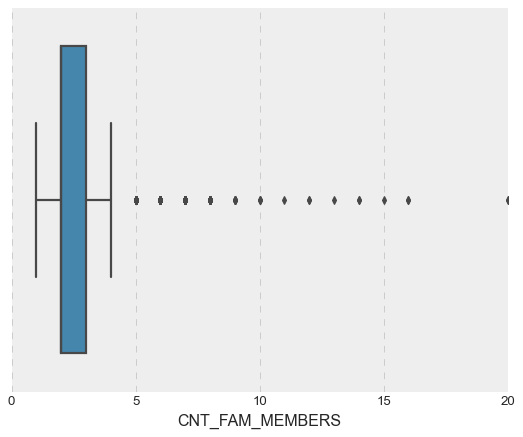

In [654]:
# CNT_FAM_MEMBERS is count of family members and it looks like discrete variable more than continuous, it is left skewed and has outliers towards right fence 
# It has only two missing values, those can be imputed with mode
ShowBoxPlot(app_df['CNT_FAM_MEMBERS'])
app_df['CNT_FAM_MEMBERS'].fillna(app_df['CNT_FAM_MEMBERS'].mode()[0],inplace=True)

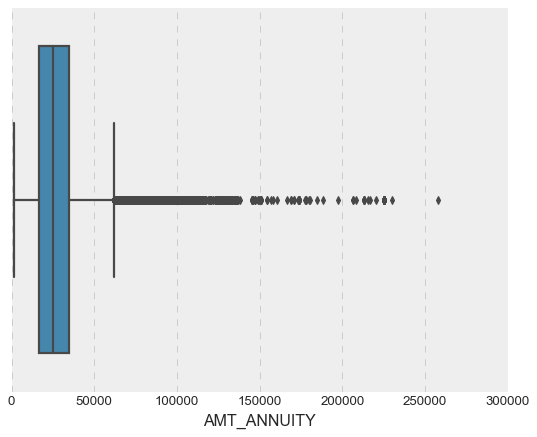

The value of AMT_ANNUITY column's median is: 24903.0


In [655]:
# AMT_ANNUITY is continuous variable and has 12 null values. The box plot shows it has quite a few number of outliers and is also left skewed
# These missing values should be imputed with median

ShowBoxPlot(app_df['AMT_ANNUITY'])

print("The value of AMT_ANNUITY column's median is:", app_df['AMT_ANNUITY'].median())

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

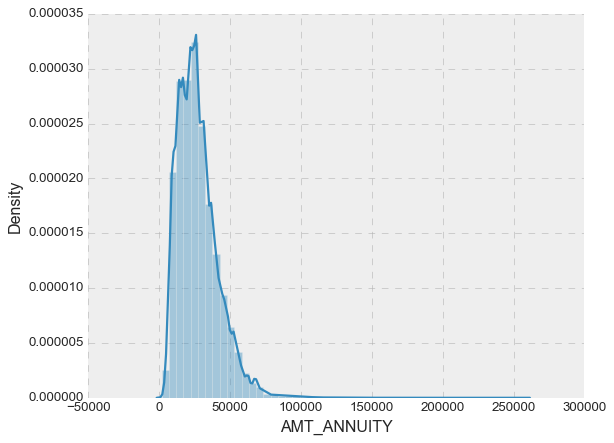

In [656]:
sns.distplot(app_df['AMT_ANNUITY'])

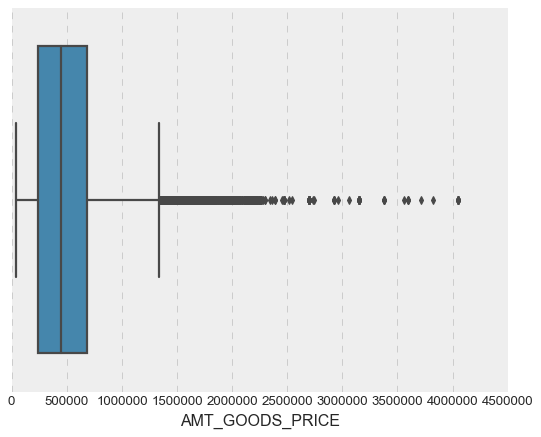

The value of AMT_GOODS_PRICE column's median is: 450000.0


In [657]:
# AMT_GOODS_PRICE has 278 nulls, box plot shows it has quite a few number of outliers
# These missing values should be imputed with median

ShowBoxPlot(app_df['AMT_GOODS_PRICE'])

print("The value of AMT_GOODS_PRICE column's median is:", app_df['AMT_GOODS_PRICE'].median())

In [658]:
# Replacing null values for 'DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_GOODS_PRICE' columns with MEDIAN
cols1=['DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY','AMT_GOODS_PRICE']
app_df[cols1] = app_df[cols1].fillna(app_df[cols1].median())

In [659]:
# NAME_TYPE_SUITE column is a Categorical column with 7 unique values. It can be replaced with MODE of the column
app_df['NAME_TYPE_SUITE'].describe()

app_df['NAME_TYPE_SUITE'] = app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0])

In [660]:
#AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
amt_req_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT']
app_df[amt_req_cols].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  
count               265992.000000              265992.000000  
mean                     1.899974                   0.265474  
std                      1.869295                   0.794056  
min                      0.000000                   0.000000  
25%                      0.000000                   0.000000  
50%                      1.000000                   0.000000  
75%                      3.000000                   0.000000  
max                     25.000000                 261.000000

<AxesSubplot:>

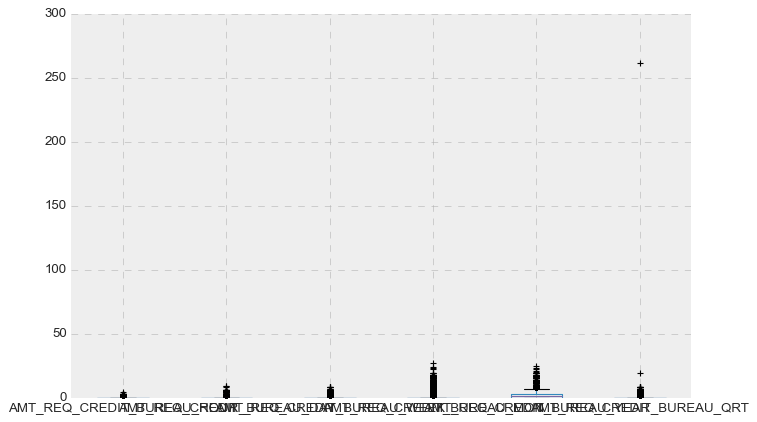

In [663]:
plt.figure(figsize=(10,6))
app_df.boxplot(amt_req_cols)

##### Columns with prefix AMT_REQ_CREDIT_BUREAU are the columns for whch enquiry was made by financial institution to credit bureau. They have outliers therefore it is best to subsitute them with median

In [664]:
app_df[amt_req_cols] = app_df[amt_req_cols].fillna(app_df[amt_req_cols].median())

<AxesSubplot:>

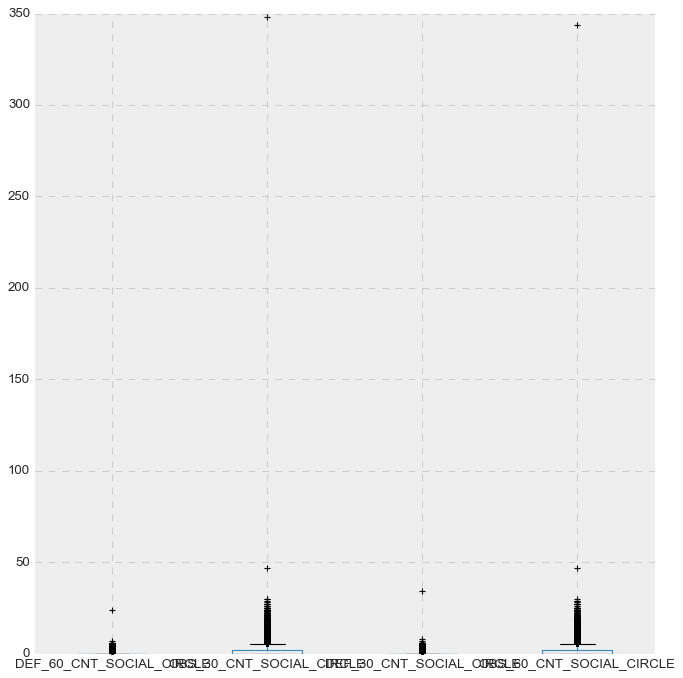

In [666]:
# "DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"
socialCols = ["DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]
plt.figure(figsize=(10,10))
app_df.boxplot(socialCols)

##### Similary  are the columns with suffix SOCIAL_CIRCLE have outliers therefore it is best to subsitute them with median

In [667]:
app_df[socialCols] = app_df[socialCols].fillna(app_df[socialCols].median())

##### OCCUPATION_TYPE column is categorical column and % of null values is 31.35% that is big number of missing value, it could be due to MNAR. I will subsititue these values with a new value named 'Not Provided'

In [668]:
 app_df['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [669]:
app_df['OCCUPATION_TYPE'].fillna('Not Provided', inplace=True)

##### We have EXT_SOURCE_2 and EXT_SOURCE_3 left with null values and they appear simillar<br>We can check correlation of these columns with Target variable to decide whether to keep them or drop them

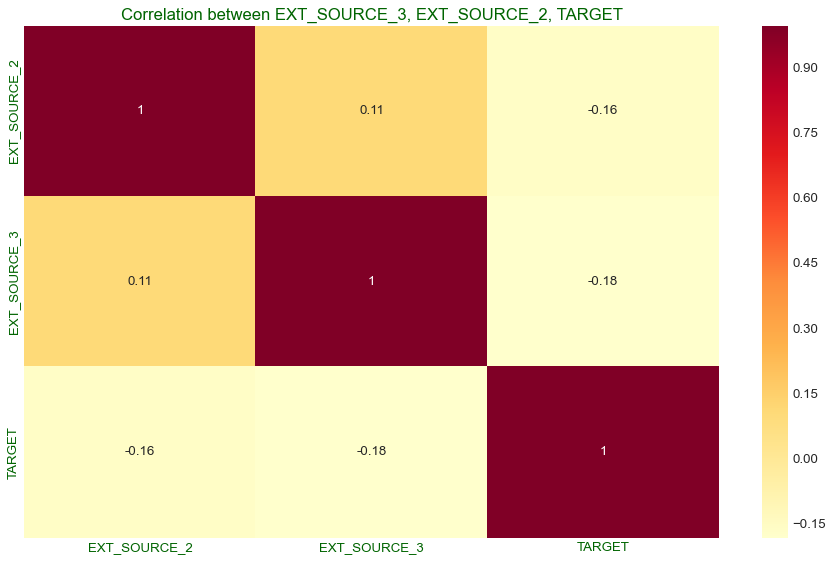

In [670]:
plt.figure(figsize=(14,8))
sns.heatmap(app_df[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),cmap='YlOrRd',annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":15,"color":'DarkGreen'})
plt.tick_params(colors='DarkGreen', which='both') 
plt.show()

#### Clearly there is no correlation between EXT_SOURCE_2, EXT_SOURCE_3 therefore we can safely drop them


In [671]:
app_df.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

### <font color='blue'> Check and Keep relevant columns

***
Now in application_data we are left with 71 columns after treating null values.<br>
There are a few columns that represent documents given by the customer starting wtih prefix FLAG_DOCUMENT and there are a few FLAG contact modality related columns <br> Need to check their correlation with TARGET to decide which to keep and which can be removed from our analysis
***

In [672]:
flagDocCols_df = app_df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']
flagDocCols_df['TARGET'] = app_df.loc[:,'TARGET']
flagDocCols_df.head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                1                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   TARGET  
0       1  
1       0  
2       0  
3       0  
4       0

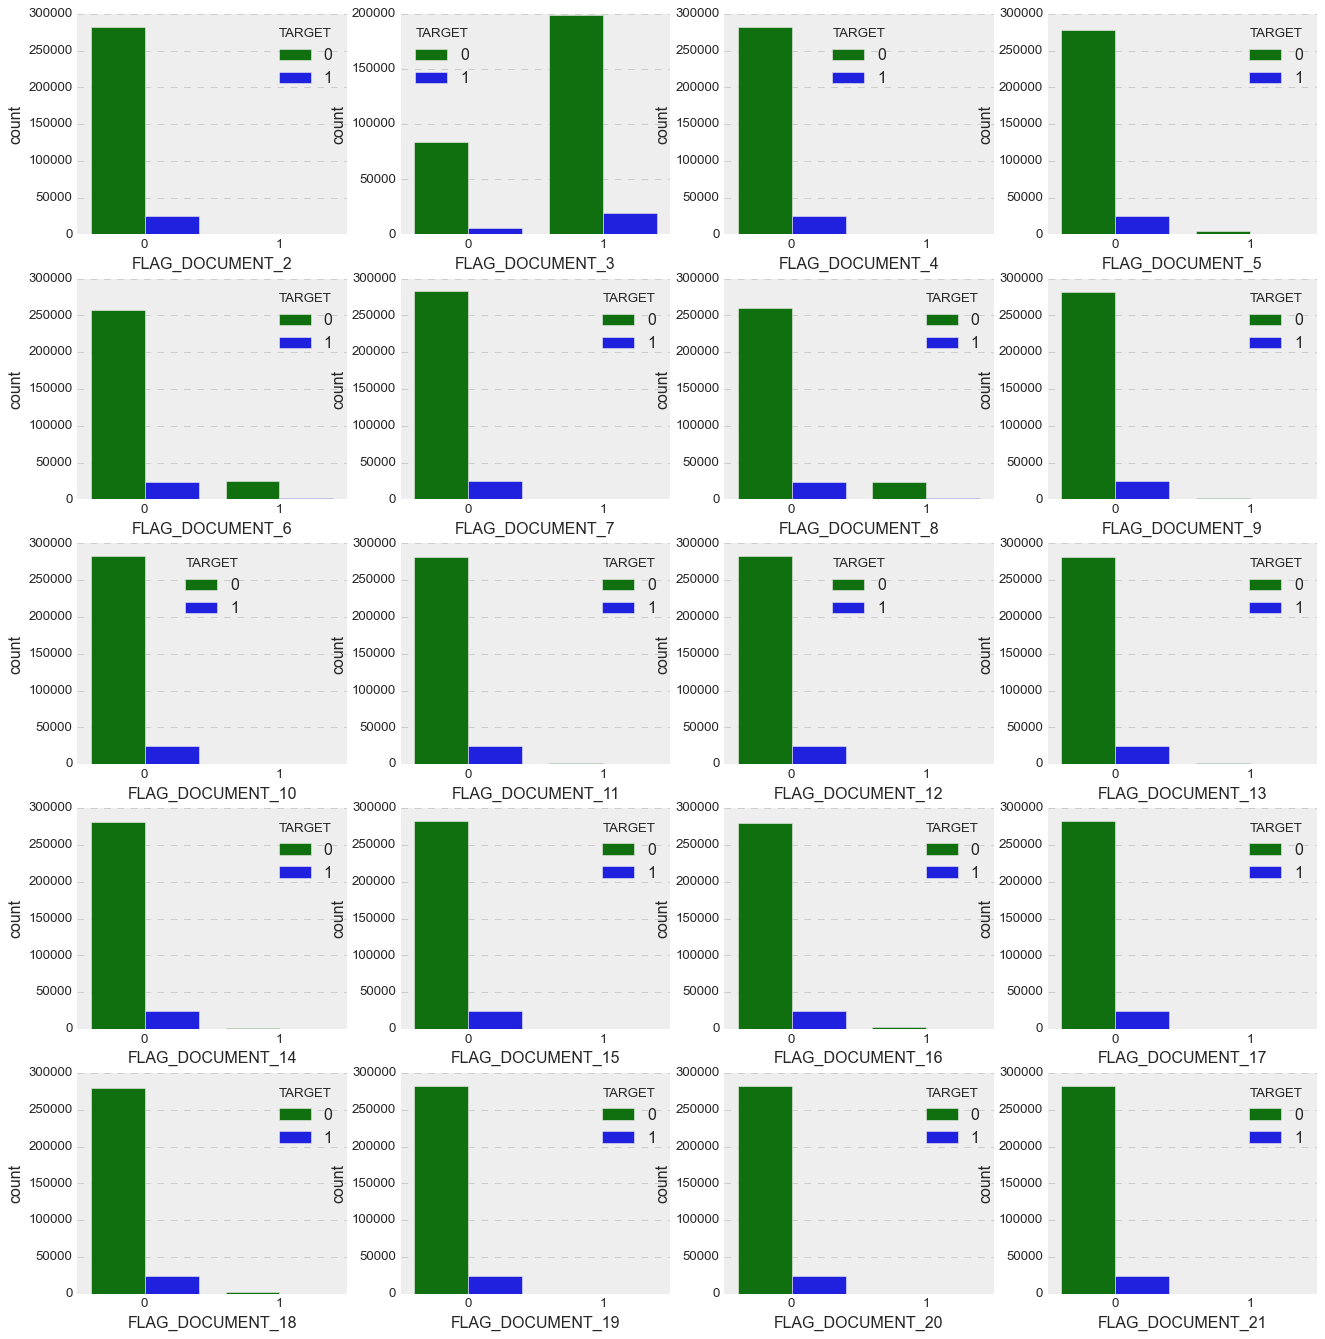

In [673]:
# Using countplots to check relation of Target with FLAG_DOCUMENT_X columns and find which should be kept
# Here Target 0 is Defaulter and 1 is Non-Defaulter or Repayer
plt.figure(figsize=(20,20))
for variables in range(20):
    plt.subplot(5,4,variables+1)
    sns.countplot(flagDocCols_df.iloc[:,variables],hue=flagDocCols_df["TARGET"],palette=["g","b"])


****
From about countplots we see that except FLAG_DOCUMENT_3 all other FLAG_DOCUMENT variables the Repayers providing documents is not available.
Only Flag_Document_3 shows better distribution of documentation provided by both Defaulters and Repayers
Thus we can keep Flag_Document_3 and remove the others
****

In [674]:
flagDocCols_df.drop(['FLAG_DOCUMENT_3','TARGET'],axis=1,inplace=True)
app_df.drop(flagDocCols_df.columns, axis=1,inplace=True)
app_df.shape

(307511, 52)

In [675]:
flagCols_df = app_df.loc[:,'FLAG_MOBIL':'FLAG_EMAIL']
flagCols_df['TARGET'] = app_df.loc[:,'TARGET']
flagCols_df.head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL  TARGET  
0           0       1  
1           0       0  
2           0       0  
3           0       0  
4           0       0

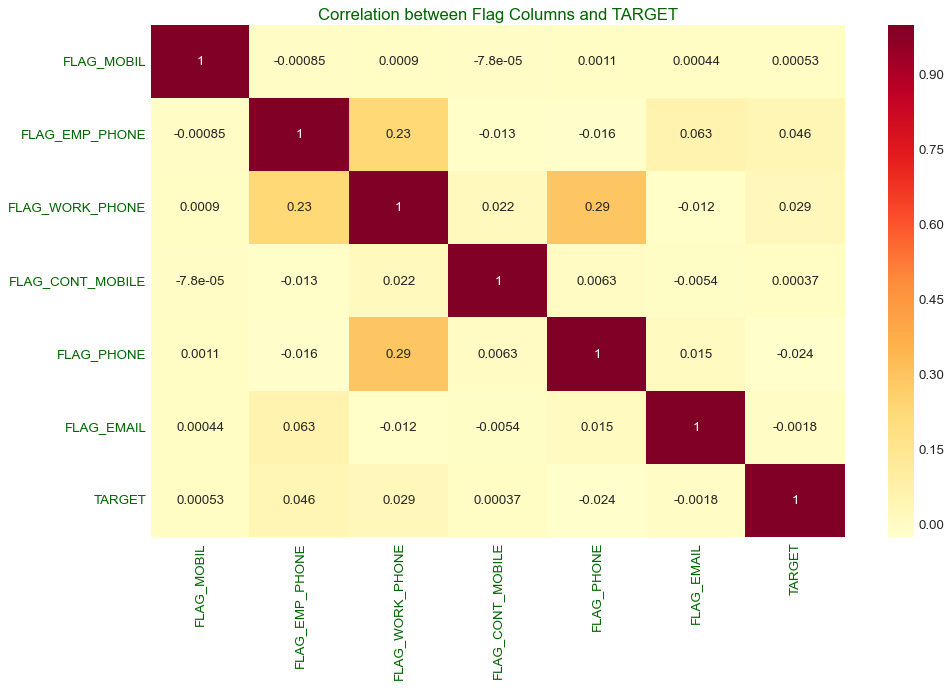

In [676]:
plt.figure(figsize=(14,8))
sns.heatmap(flagCols_df.corr(),cmap='YlOrRd',annot=True)
plt.title("Correlation between Flag Columns and TARGET", fontdict={"fontsize":15,"color":'DarkGreen'})
plt.tick_params(colors='DarkGreen', which='both') 
plt.show()

***
From above Correlation Marix we see that none of the FLAG Contact related columns have any correlation with TARGET column
Hence these can be dropped as well
***

In [677]:
flagCols_df.drop(['TARGET'],axis=1,inplace=True)
app_df.drop(flagCols_df.columns, axis=1,inplace=True)
app_df.shape

(307511, 46)

### <font color='blue'> Check Data Types and Standardize Columns

#### Look at the columns and check their first 10 values

In [678]:
pd.set_option('display.max_columns', None)
app_df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [679]:
app_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']].describe()

AMT_INCOME_TOTAL    AMT_CREDIT  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05     3.075110e+05
mean       1.687979e+05  5.990260e+05     5.383163e+05
std        2.371231e+05  4.024908e+05     3.692890e+05
min        2.565000e+04  4.500000e+04     4.050000e+04
25%        1.125000e+05  2.700000e+05     2.385000e+05
50%        1.471500e+05  5.135310e+05     4.500000e+05
75%        2.025000e+05  8.086500e+05     6.795000e+05
max        1.170000e+08  4.050000e+06     4.050000e+06

### Strategy to perform standardization
***
* There are quite a few categorical columns like NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,OCCUPATION_TYPE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, need to check their values and convert them to Nominal/Categorical variables
* There are numerical columns such as CNT_CHILDREN,CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE, FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,	AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR for which after outlier treatment I need to check if they can be also converted from float to integer and if they can be converted to nominal variables for analysis
* There are columns with prefix DAYS_ that have negative values, need to convert them to positive.
* NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE columns need to be checked to see if the values can be be standardized

I will do binning of following columns:
* DAYS_BIRTH can be binned too for age grouping for analysing as per agegroup
* DAYS_EMPLOYED can be binned too for experience grouping for analysing as per experiencegroup
* AMT_INCOME_TOTAL,AMT_CREDIT have varied ranges from very low values to extremely high, these can be categorized in different bins and create new variables that would be ordinal
***

In [42]:
appCatCols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
app_df[appCatCols].nunique() ### Check unique values in the apparent categorical columns

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
OCCUPATION_TYPE               19
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [43]:
# CODE_GENDER has three unique values, XNA appears to be related to not provided has only 4 values
print(app_df['CODE_GENDER'].value_counts())
len(appCatCols)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


12

In [45]:
### Check unique values of numerical columns and decide whether to convert them to Category
appNumCols = ['CNT_CHILDREN','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_3','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
print(len(appNumCols))
app_df[appNumCols].nunique()

19


CNT_CHILDREN                   15
CNT_FAM_MEMBERS                17
REGION_RATING_CLIENT            3
REGION_RATING_CLIENT_W_CITY     3
REG_REGION_NOT_LIVE_REGION      2
REG_REGION_NOT_WORK_REGION      2
LIVE_REGION_NOT_WORK_REGION     2
REG_CITY_NOT_LIVE_CITY          2
REG_CITY_NOT_WORK_CITY          2
LIVE_CITY_NOT_WORK_CITY         2
OBS_30_CNT_SOCIAL_CIRCLE       33
DEF_30_CNT_SOCIAL_CIRCLE       10
OBS_60_CNT_SOCIAL_CIRCLE       33
DEF_60_CNT_SOCIAL_CIRCLE        9
FLAG_DOCUMENT_3                 2
AMT_REQ_CREDIT_BUREAU_WEEK      9
AMT_REQ_CREDIT_BUREAU_MON      24
AMT_REQ_CREDIT_BUREAU_QRT      11
AMT_REQ_CREDIT_BUREAU_YEAR     25
dtype: int64

***
* Checking numerical columns it makes sense to convert ones that have 2 or 3 unique values to Categorical/Nominal coluns
* I will convert 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY' to Nominal columns
* For the rest I will convert them to integer if they are float
***

In [46]:
appCatCols.extend(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_3'])
print(len(appCatCols))

21


In [47]:
for cols in appCatCols:
    app_df[cols] = pd.Categorical(app_df[cols])
app_df[appCatCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   NAME_CONTRACT_TYPE           307511 non-null  category
 1   CODE_GENDER                  307511 non-null  category
 2   FLAG_OWN_CAR                 307511 non-null  category
 3   FLAG_OWN_REALTY              307511 non-null  category
 4   OCCUPATION_TYPE              307511 non-null  category
 5   NAME_TYPE_SUITE              307511 non-null  category
 6   NAME_INCOME_TYPE             307511 non-null  category
 7   NAME_EDUCATION_TYPE          307511 non-null  category
 8   NAME_FAMILY_STATUS           307511 non-null  category
 9   NAME_HOUSING_TYPE            307511 non-null  category
 10  WEEKDAY_APPR_PROCESS_START   307511 non-null  category
 11  ORGANIZATION_TYPE            307511 non-null  category
 12  REGION_RATING_CLIENT         307511 non-null

In [48]:
appIntCols=['CNT_CHILDREN','CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [49]:
app_df[appIntCols].info()
# Except 'CNT_CHILDREN' all other columns in appIntCols are float, let us check their value counts
appIntCols.remove('CNT_CHILDREN')
for i in appIntCols:
    print(app_df[i].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CNT_CHILDREN                307511 non-null  int64  
 1   CNT_FAM_MEMBERS             307511 non-null  float64
 2   OBS_30_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 3   DEF_30_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 4   OBS_60_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 5   DEF_60_CNT_SOCIAL_CIRCLE    307511 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_WEEK  307511 non-null  float64
 7   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  float64
 8   AMT_REQ_CREDIT_BUREAU_QRT   307511 non-null  float64
 9   AMT_REQ_CREDIT_BUREAU_YEAR  307511 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 23.5 MB
2.0     158359
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0   

In [50]:
# None of these have decimal values and hence these can be converted to INTeger
app_df.loc[:,appIntCols]=app_df.loc[:,appIntCols].apply(lambda col: col.astype('int',errors='ignore'))
app_df[appIntCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   CNT_FAM_MEMBERS             307511 non-null  int32
 1   OBS_30_CNT_SOCIAL_CIRCLE    307511 non-null  int32
 2   DEF_30_CNT_SOCIAL_CIRCLE    307511 non-null  int32
 3   OBS_60_CNT_SOCIAL_CIRCLE    307511 non-null  int32
 4   DEF_60_CNT_SOCIAL_CIRCLE    307511 non-null  int32
 5   AMT_REQ_CREDIT_BUREAU_WEEK  307511 non-null  int32
 6   AMT_REQ_CREDIT_BUREAU_MON   307511 non-null  int32
 7   AMT_REQ_CREDIT_BUREAU_QRT   307511 non-null  int32
 8   AMT_REQ_CREDIT_BUREAU_YEAR  307511 non-null  int32
dtypes: int32(9)
memory usage: 10.6 MB


In [51]:
# Now looks at Days column
daysCol = [ dc for dc in app_df.columns if 'DAYS_' in dc]
app_df[daysCol].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -962.858119  
std                826.807226  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max                  0.000000

In [52]:
# convert all these numbers for Days_ columns to positive 
app_df[daysCol] = abs(app_df[daysCol])
app_df[daysCol].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.858119  
std                826.807226  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

In [53]:
#Check values for column NAME_EDUCATION_TYPE
print(app_df['NAME_EDUCATION_TYPE'].value_counts())
eduvalues = {'Secondary / secondary special': 'Secondary','Higher education':'Higher','Incomplete higher':'Incomplete Higher','Lower secondary':'Lower Secondary','Academic degree':'Degree'}
app_df = app_df.replace({'NAME_EDUCATION_TYPE' : eduvalues})
print(app_df['NAME_EDUCATION_TYPE'].value_counts())

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Secondary            218391
Higher                74863
Incomplete Higher     10277
Lower Secondary        3816
Degree                  164
Name: NAME_EDUCATION_TYPE, dtype: int64


In [54]:
#Check values for column NAME_FAMILY_STATUS,
print(app_df['NAME_FAMILY_STATUS'].value_counts())
famstvalues = {'Single / not married':'Single'}
app_df = app_df.replace({'NAME_FAMILY_STATUS' : famstvalues})
print(app_df['NAME_FAMILY_STATUS'].value_counts())

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
Married           196432
Single             45444
Civil marriage     29775
Separated          19770
Widow              16088
Unknown                2
Name: NAME_FAMILY_STATUS, dtype: int64


In [55]:
#Check values for column NAME_HOUSING_TYPE
print(app_df['NAME_HOUSING_TYPE'].value_counts())
#This looks to be fine

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


### <font color='blue'/> Created binned columns for analysing with Target columns 

In [61]:
# Create AGE_GROUP column for analysis  
bins = [0,30,40,50,60,100]
slots = ['0-30','30-40','40-50','50-60','60 Plus']

app_df['AGE_GROUP']=pd.cut((app_df['DAYS_BIRTH']//365),bins=bins,labels=slots)

30-40      27.028952
40-50      24.194582
50-60      22.054170
0-30       17.172069
60 Plus     9.550227
Name: AGE_GROUP, dtype: float64


<AxesSubplot:ylabel='AGE_GROUP'>

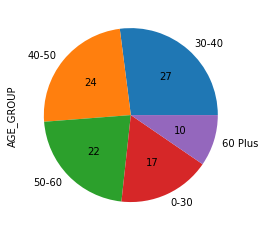

In [76]:
# From this distribution we can see that around 44% applicants are below 40 and 56% are above 40 years
print(app_df['AGE_GROUP'].value_counts(normalize=True)*100)
app_df['AGE_GROUP'].value_counts().plot.pie(autopct="%0.0f")

In [65]:
# Create EMPLOYMENT_EXP column for analysis
bins = [0,2,5,10,15,20,30,100]
slots = ['0-2','2-5','5-10','10-15','15-20','20-30','30 Above']

app_df['EMPLOYMENT_EXP']=pd.cut((app_df['DAYS_EMPLOYED']//365),bins=bins,labels=slots)

2-5         28.160440
0-2         27.421923
5-10        24.966441
10-15       10.225078
15-20        4.339236
20-30        3.750117
30 Above     1.136764
Name: EMPLOYMENT_EXP, dtype: float64


<AxesSubplot:ylabel='EMPLOYMENT_EXP'>

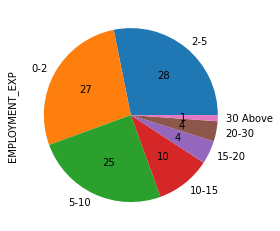

In [75]:
print(app_df['EMPLOYMENT_EXP'].value_counts(normalize=True)*100)

# From this distribution we can see that around 55% of applicants are between 0-5 year experience and 25% are 5-10 year experience

app_df['EMPLOYMENT_EXP'].value_counts().plot.pie(autopct="%0.0f")

In [79]:
#create RANGE_INCOME based on AMT_INCOME_TOTAL
print(app_df['AMT_INCOME_TOTAL'].describe())

# Range of annual income including outliers is from 25650 till 1170Million

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300K','300k-400K','400k-500K','500k-600K','600k-700K','700k-800K',
       '800k-900K','900k-1M', '1M Above']

app_df['RANGE_INCOME']=pd.cut(app_df['AMT_INCOME_TOTAL']/100000,bins=bins,labels=slots)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


100K-200K    50.697218
200k-300K    21.194896
0-100K       20.714258
300k-400K     4.772559
400k-500K     1.743369
500k-600K     0.356088
600k-700K     0.282594
800k-900K     0.096908
1M Above      0.080323
700k-800K     0.052682
900k-1M       0.009105
Name: RANGE_INCOME, dtype: float64


<AxesSubplot:ylabel='RANGE_INCOME'>

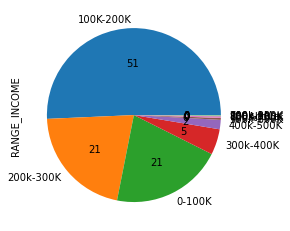

In [80]:
print(app_df['RANGE_INCOME'].value_counts(normalize=True)*100)

# From this distribution we can see that around 51% of applicants are in range of 100-200K salary and 42% in range of 0 to 300K
app_df['RANGE_INCOME'].value_counts().plot.pie(autopct="%0.0f")

In [88]:
#create RANGE_CREDIT based on AMT_CREDIT
print(app_df['AMT_CREDIT'].describe())

# Range of annual credit including outliers is from 45000 till 4 Million

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300K','300k-400K','400k-500K','500k-600K','600k-700K','700k-800K','800k-900K','900k-1M', '1M Above']

app_df['RANGE_CREDIT']=pd.cut(app_df['AMT_CREDIT']/100000,bins=bins,labels=slots)

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


200k-300K    17.824728
1M Above     16.254703
500k-600K    11.131960
400k-500K    10.418489
100K-200K     9.801275
300k-400K     8.564897
600k-700K     7.820533
800k-900K     7.086576
700k-800K     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: RANGE_CREDIT, dtype: float64


<AxesSubplot:ylabel='RANGE_CREDIT'>

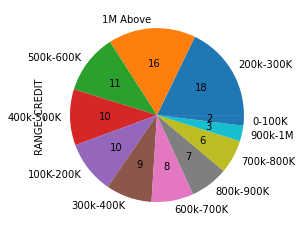

In [89]:
print(app_df['RANGE_CREDIT'].value_counts(normalize=True)*100)

# From this distribution we can see that around 58% Credit was taken in range of 100K to 600K and 16% applicant requested for 1M+ Credit

app_df['RANGE_CREDIT'].value_counts().plot.pie(autopct="%0.0f")

### <font color='blue'/> Identify Outliers and Outlier Treatment

In [90]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.487841     5.383163e+05   
std    4.024908e+05   14493.461065     3.692890e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000    307511.000000   
mean         4986.120328      2994.202373         2.152664   
std          3522.886321      1509.450419         0.910679   
min             0.000000         0.000000         1.000000   
25%          2010.000000      1720.000000         2.000000   
50%          4504.000000      3254.000000         2.000000   
75%          7479.500000      4299.000000         3.000000   
max         24672.000000      7197.000000        20.000000   

       HOUR_APPR_PROCESS_START  OBS_30_CNT_SOCIAL_CIRCLE  \
count            307511.000000             307511.000000   
mean                 12.063419                  1.417523   
std                   3.265832                  2.398395   
min                   0.000000                  0.000000   
25%                  10.000000                  0.000000   
50%                  12.000000                  0.000000   
75%                  14.000000                  2.000000   
max                  23.000000                348.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   0.142944                  1.400626   
std                    0.446033                  2.377224   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             307511.000000           307511.000000   
mean                   0.099717              962.858119   
std                    0.361735              826.807226   
min                    0.000000                0.000000   
25%                    0.000000              274.000000   
50%                    0.000000              757.000000   
75%                    0.000000             1570.000000   
max                   24.000000             4292.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count          

***
#### Initial observation of Outliers
* CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, CNT_FAM_MEMBERS, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR have outliers

Will use value_counts and box plots to identify outliers

***

In [134]:
## Definition to get value counts of columns
def countValuesinCol(df, cols):
    for i in cols:
        print (df[i].value_counts())

In [92]:
## First work with CNT_CHILDREN, CNT_FAM_MEMBERS, DAYS_LAST_PHONE_CHANGE,HOUR_APPR_PROCESS_START,REGION_POPULATION_RELATIVE
outlierCols1 = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']
app_df[outlierCols1].describe()

CNT_CHILDREN  CNT_FAM_MEMBERS
count  307511.000000    307511.000000
mean        0.417052         2.152664
std         0.722121         0.910679
min         0.000000         1.000000
25%         0.000000         2.000000
50%         0.000000         2.000000
75%         1.000000         3.000000
max        19.000000        20.000000

In [93]:
countValuesinCol(app_df,outlierCols1)

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int642     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
12         2
14         2
16         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

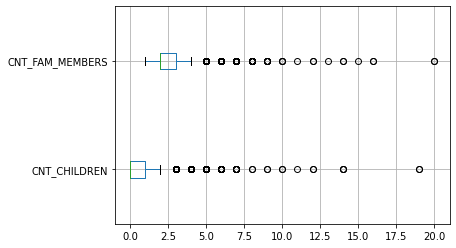

In [94]:
app_df[outlierCols1].boxplot(vert=False)
plt.show()

In [95]:
#Now check the days_ column
app_df[daysCol].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               962.858119  
std                826.807226  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max               4292.000000

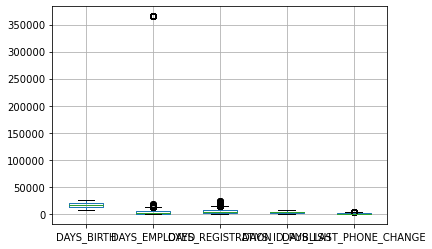

In [97]:
app_df[daysCol].boxplot()
plt.show()

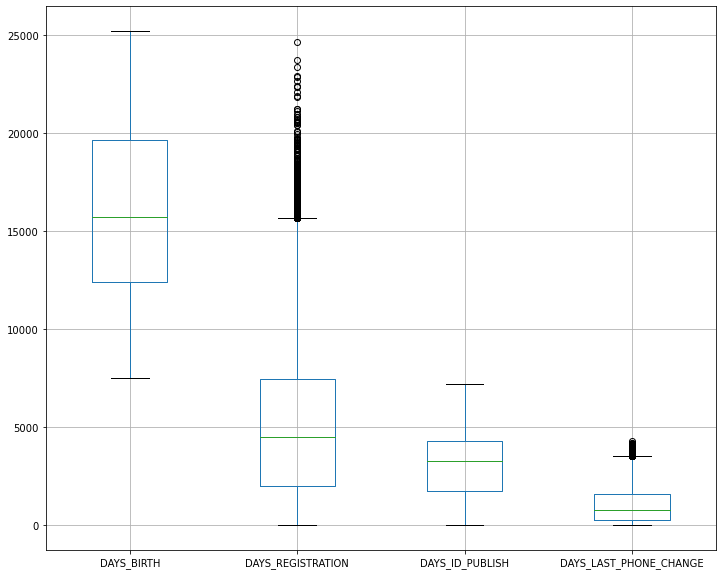

In [106]:
#From above boxplot it looks like Day_Employed has outlier beyonk 350K, removing that column and then check for other days
daysCol.remove('DAYS_EMPLOYED')
plt.figure(figsize=(12,10))
app_df[daysCol].boxplot()
plt.show()

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE
count      3.075110e+05  3.075110e+05  307511.000000     3.075110e+05
mean       1.687979e+05  5.990260e+05   27108.487841     5.383163e+05
std        2.371231e+05  4.024908e+05   14493.461065     3.692890e+05
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06


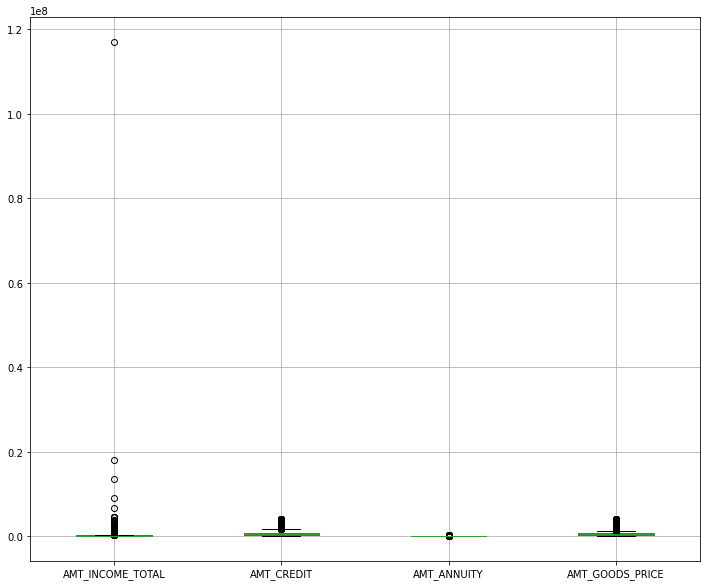

In [109]:
print(app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe())
plt.figure(figsize=(12,10))
app_df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].boxplot()
plt.show()

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.417523                  0.142944   
std                    2.398395                  0.446033   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             307511.000000             307511.000000  
mean                   1.400626                  0.099717  
std                    2.377224                  0.361735  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.00000

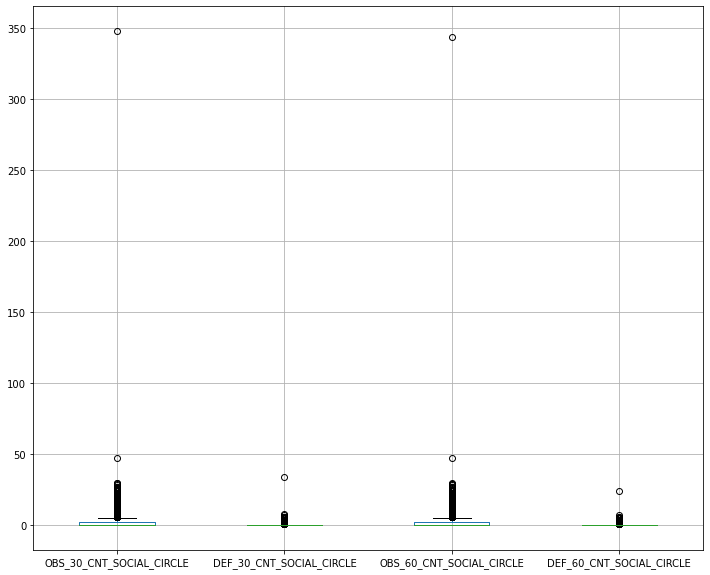

In [110]:
print(app_df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe())
plt.figure(figsize=(12,10))
app_df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].boxplot()
plt.show()

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000      

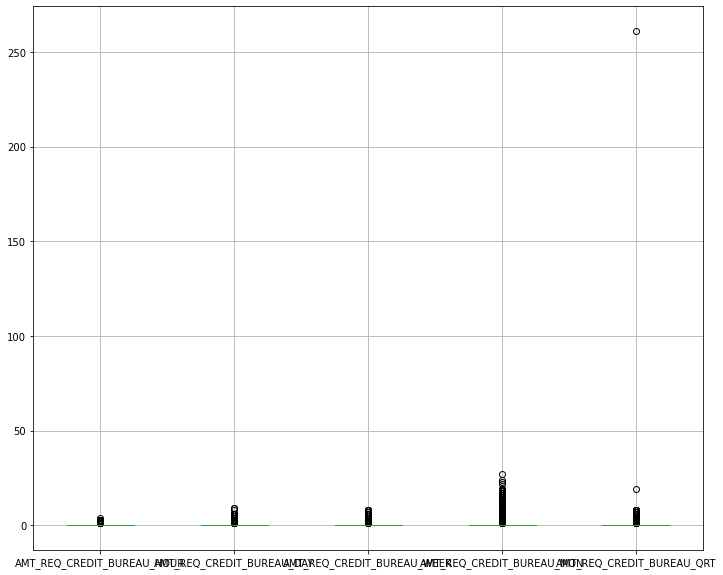

In [111]:
print(app_df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].describe())
plt.figure(figsize=(12,10))
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']].boxplot()
plt.show()

### Observations on Outliers
* CNT_FAM_MEMBERS and CNT_CHILDREN have a few outliers
* DAYS_BIRTH and DAYS_ID_PUBLISH have no outliers
* DAYS_EMPLOYED has an outlier 365243, this looks to be an incorrect entry made since no person's year of experience be 1000+ years
* 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'all have outliers 
* 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE' have outliers too however OBS_30_CNT_SOCIAL_CIRCLE and 'OBS_60_CNT_SOCIAL_CIRCLE' have higher number of outliers and a couple high range outlier that may have been an entry issue
* AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT' all have outliers however 'AMT_REQ_CREDIT_BUREAU_MON'has maximum number of outliers and AMT_REQ_CREDIT_BUREAU_QRT has one outlier that is 261 which looks to be a mistaken entry

## <font color='brown'> Step 2b - Understanding Dataset 'previous_application.csv'
It contains information about the client’s previous loan data. 

In [112]:
prevapp_df = pd.read_csv('previous_application.csv') 

In [113]:
prevapp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [114]:
prevapp_df.shape

(1670214, 37)

In [115]:
prevapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

***
#### Initial observations about previous_application.csv
From the above checks there are 1670214 rows and 37 columns. <br> 11 columns are integer or float type and 15 are of object types.<br>Like application dataset, this one also has a few columns with prefix as Days have negative values, those needs to be checked and corrected.
***

## <font color='brown'> Step 3b - Data Wrangling on 'previous_application.csv'

### <font color='blue'> Check Null Values

In [116]:
nullPercentage(prevapp_df)[nullPercentage(prevapp_df)>0]

RATE_INTEREST_PRIVILEGED     99.64
RATE_INTEREST_PRIMARY        99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
NFLAG_INSURED_ON_APPROVAL    40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
DAYS_FIRST_DRAWING           40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
dtype: float64

### <font color='blue'> Analyze and Impute/Remove null values

***
#### Initial Observation on null values, there are 11 columns with >40% of null values I will drop them<br>For the remaining I will impute them depending on type of column and % of data missing and if there is relation with any other variable
***

In [117]:
prevapp_colsToDrop = nullPercentage(prevapp_df)[nullPercentage(prevapp_df)>40].index
prevapp_colsToDrop

Index(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT',
       'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING'],
      dtype='object')

In [118]:
prevapp_df.drop(prevapp_colsToDrop,axis=1,inplace=True)

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


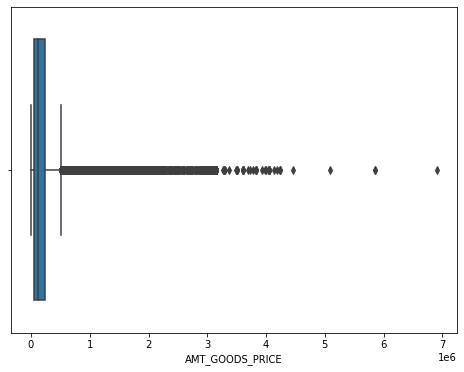

In [119]:
# AMT_GOODS_PRICE is a continuous column and based on boxplot it is left skewed with a range of outliers
# We can replace missing values with median
print(prevapp_df['AMT_GOODS_PRICE'].describe())
ShowBoxPlot(prevapp_df['AMT_GOODS_PRICE'])

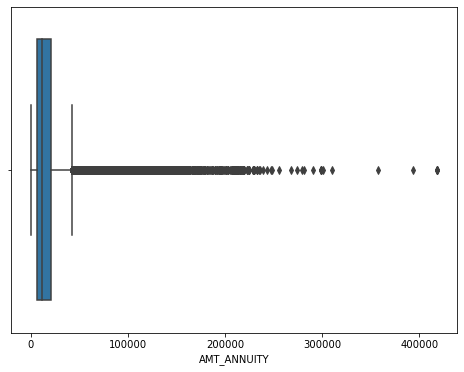

In [120]:
# AMT_ANNUITY is a continuous column and based on boxplot it is left skewed with a range of outliers
# It is a needed column and has 22% missing values, we can replace missing values with median
ShowBoxPlot(prevapp_df['AMT_ANNUITY'])

In [121]:
prevapp_df[['AMT_GOODS_PRICE','AMT_ANNUITY']]=prevapp_df[['AMT_GOODS_PRICE','AMT_ANNUITY']].fillna(prevapp_df[['AMT_GOODS_PRICE','AMT_ANNUITY']].median())

In [122]:
#CNT_PAYMENT indicates credit at time of previous application meaning if they had previous loans and missing value could be MAR and it has 22% missing values
#It could be so that applicant is first time applicant or may be loan was cancelled before processing
# We can find out for which NAME_CONTRACT_STATUS types these values are missing to decide if we can impute this value with 0 or not
# It is clear that larger chunk is with Canceled and Unused offer combined, hence I will impute these missing value

prevapp_df.loc[prevapp_df['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [123]:
prevapp_df['CNT_PAYMENT'].fillna(0, inplace=True)

In [124]:
#PRODUCT_COMBINATION is a categorical column and has only 346 missing values I will imppute these with mode that is cash
prevapp_df['PRODUCT_COMBINATION'].isna().sum()
prevapp_df['PRODUCT_COMBINATION'] = prevapp_df['PRODUCT_COMBINATION'].fillna(prevapp_df['PRODUCT_COMBINATION'].mode()[0])

### <font color='blue'>Check Data Types and Standardize Columns

#### Look at the columns and check their first 10 values

In [126]:
pd.set_option('display.max_columns', None)
prevapp_df.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans    11250.000              0.0   
7     1656711      296299         Cash loans    11250.000              0.0   
8     2367563      342292         Cash loans    11250.000              0.0   
9     2579447      334349         Cash loans    11250.000              0.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   
5    340573.5         315000.0                   SATURDAY   
6         0.0         112320.0                    TUESDAY   
7         0.0         112320.0                     MONDAY   
8         0.0         112320.0                     MONDAY   
9         0.0         112320.0                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   
5                       1      Everyday expenses             Approved   
6                       1                    XNA             Canceled   
7                       1                    XNA             Canceled   
8                       1                    XNA             Canceled   
9                       1                    XNA             Canceled   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   
5           -684  Cash through the bank                XAP         Repeater   
6            -14                    XNA                XAP         Repeater   
7            -21                    XNA                XAP         Repeater   
8           -386                    XNA                XAP         Repeater   
9            -57                    XNA                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash       

### Strategy to standardize columns in previous_application

* NAME_CONTRACT_TYPE, WEEKDAY_APPR_PROCESS_START, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE, NAME_SELLER_INDUSTRY, PRODUCT_COMBINATION are nominal/categorical columns so I will convert them to Category
* NAME_YIELD_GROUP appears to be Ordinal column
* DAYS_DECISION has negative values need to convert that to absoluted

In [128]:
# DAYS_DECISION has negative values need to convert that to absoluted
print(prevapp_df['DAYS_DECISION'].describe())
prevapp_df['DAYS_DECISION'] = abs(prevapp_df['DAYS_DECISION'])
print(prevapp_df['DAYS_DECISION'].describe())

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


In [129]:
prevappCatCols = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'PRODUCT_COMBINATION','NAME_YIELD_GROUP']
prevapp_df[prevappCatCols].nunique()

NAME_CONTRACT_TYPE             4
WEEKDAY_APPR_PROCESS_START     7
NAME_CASH_LOAN_PURPOSE        25
NAME_CONTRACT_STATUS           4
NAME_PAYMENT_TYPE              4
CODE_REJECT_REASON             9
NAME_CLIENT_TYPE               4
NAME_GOODS_CATEGORY           28
NAME_PORTFOLIO                 5
NAME_PRODUCT_TYPE              3
CHANNEL_TYPE                   8
NAME_SELLER_INDUSTRY          11
PRODUCT_COMBINATION           17
NAME_YIELD_GROUP               5
dtype: int64

In [136]:
#Check values counts for columns with unique values in single digits
prevapp_df['NAME_CONTRACT_TYPE'].value_counts()
countValuesinCol(prevapp_df,['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP','WEEKDAY_APPR_PROCESS_START','CODE_REJECT_REASON','CHANNEL_TYPE'])

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64
XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int

In [139]:
# WEEKDAY_APPR_PROCESS_START is for which day of the week did the client apply for the loan, it does not look to be relevant for EDA, hence dropping it
prevapp_df.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)
prevappCatCols.remove('WEEKDAY_APPR_PROCESS_START')

In [144]:
##Check values counts for columns with unique values in double digits
countValuesinCol(prevapp_df,['NAME_CASH_LOAN_PURPOSE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION'])

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [146]:
# Since all columns in prevappCatCols are categorical, converting them to categorical
for cols in prevappCatCols:
     prevapp_df[cols] = pd.Categorical(prevapp_df[cols])
prevapp_df[prevappCatCols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   NAME_CONTRACT_TYPE      1670214 non-null  category
 1   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 2   NAME_CONTRACT_STATUS    1670214 non-null  category
 3   NAME_PAYMENT_TYPE       1670214 non-null  category
 4   CODE_REJECT_REASON      1670214 non-null  category
 5   NAME_CLIENT_TYPE        1670214 non-null  category
 6   NAME_GOODS_CATEGORY     1670214 non-null  category
 7   NAME_PORTFOLIO          1670214 non-null  category
 8   NAME_PRODUCT_TYPE       1670214 non-null  category
 9   CHANNEL_TYPE            1670214 non-null  category
 10  NAME_SELLER_INDUSTRY    1670214 non-null  category
 11  PRODUCT_COMBINATION     1670214 non-null  category
 12  NAME_YIELD_GROUP        1670214 non-null  category
dtypes: category(13)
memory usage: 20.7 MB


In [147]:
# bin AMT_ANNUITY,AMT_APPLICATION, AMT_CREDIT,AMT_GOODS_PRICE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 8   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 9   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 10  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 11  NAME_CONTRACT_STATUS         1670214 non-null  category
 12  DAYS_DECISION               

### <font color='blue'/> Identify Outliers and Outlier Treatment

In [148]:
prevapp_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     2.011815e+05             1.248418e+01   
std    3.185746e+05     2.808629e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06  
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.247621e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.447588e+01  
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00  
25%              1.000000e+00   2.800000e+02     -1.000000e+00  0.000000e+00  
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.000000e+01  
75%              1.000000e+00   1.300000e+03      8.200000e+01  1.600000e+01  
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01

#### Initial Observation on outliers

* AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT have outliers
* Need to check boxplot to confirm

        AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     2.011815e+05
std    1.317751e+04     2.927798e+05  3.185746e+05     2.808629e+05
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00
25%    7.547096e+03     1.872000e+04  2.416050e+04     6.750000e+04
50%    1.125000e+04     7.104600e+04  8.054100e+04     1.123200e+05
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06


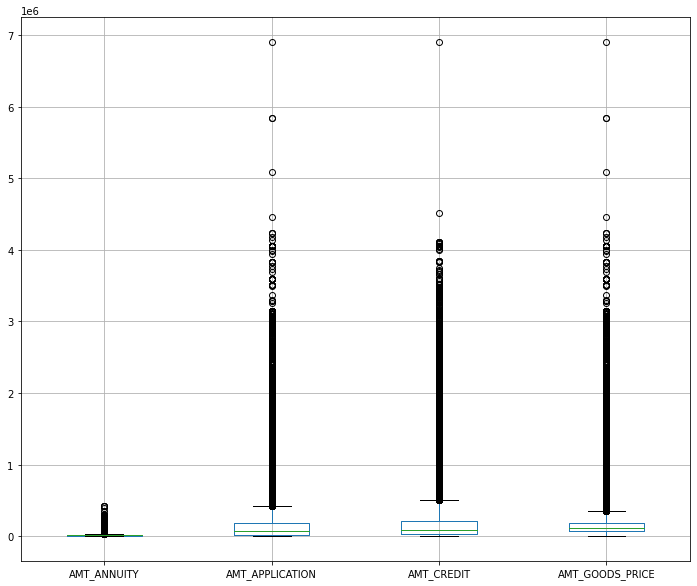

In [150]:
print(prevapp_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']].describe())
plt.figure(figsize=(12,10))
prevapp_df[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']].boxplot()
plt.show()

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


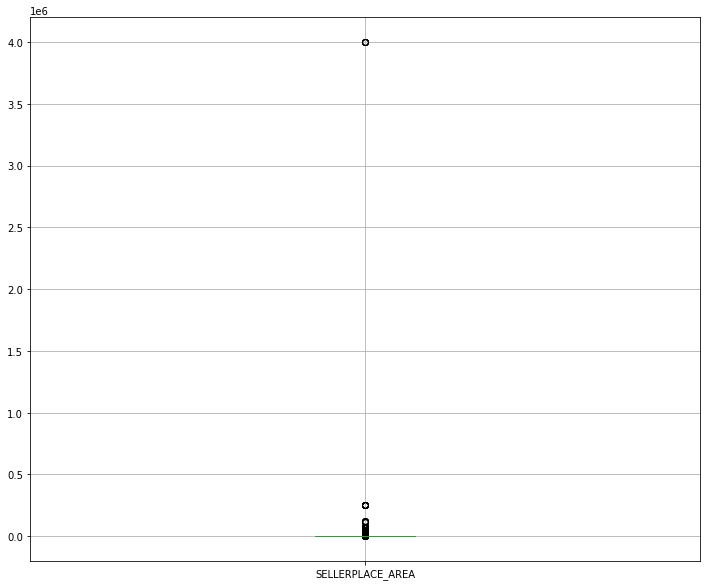

In [153]:
print(prevapp_df['SELLERPLACE_AREA'].describe())
plt.figure(figsize=(12,10))
prevapp_df[['SELLERPLACE_AREA']].boxplot()
plt.show()

       DAYS_DECISION   CNT_PAYMENT
count   1.670214e+06  1.670214e+06
mean    8.806797e+02  1.247621e+01
std     7.790997e+02  1.447588e+01
min     1.000000e+00  0.000000e+00
25%     2.800000e+02  0.000000e+00
50%     5.810000e+02  1.000000e+01
75%     1.300000e+03  1.600000e+01
max     2.922000e+03  8.400000e+01


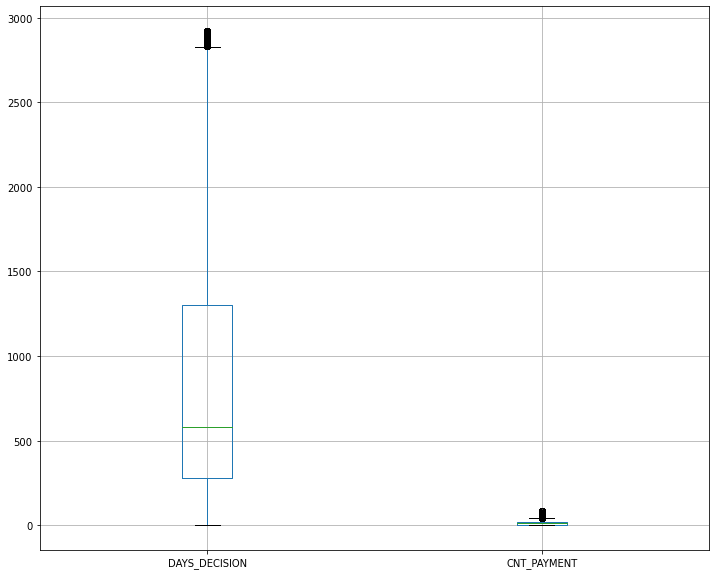

In [154]:
print(prevapp_df[['DAYS_DECISION','CNT_PAYMENT']].describe())
plt.figure(figsize=(12,10))
prevapp_df[['DAYS_DECISION','CNT_PAYMENT']].boxplot()
plt.show()

### Observations on Outliers

* AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE have huge numbe of outliers
* SELLERPLACE_AREA has a few outlier but it has one outlier at value 40M which either is mistyped entry or a single loan taken for a very huge land area
* DAYS_DECISION and CNT_PAYMENT too have fewer outliers towards upper extreme whisker

## <font color='brown'> Step 4 - Perform EDA

#### EDA Approach

* Check Imbalance in Target Variable
* Categorical Univariate Analysis
* Categorical Ordinal Univariate Analysis
* Categorical Bivariate analysiss
* Numerical Univariate Analysis
* Numerical Bivariate analysis
* Correlation Matrix

In [397]:
## TO perform analysis on variables from application_data splitting data frame into two for Defaults and Re-Payers
app_defaulter=app_df[app_df['TARGET']==1]    # Dataframe related to defaulters
app_payers=app_df[app_df['TARGET']==0]    # Dataframe related to repayers

### <font color='purple'/>Function Definitions to draw PIE Charts, Count Plots


In [602]:
def ShowPie(target,label,title):
    plt.figure(figsize=(6,6))
    clr = ['gold', 'red']
    plt.pie(app_df[target].value_counts(normalize=True)*100,labels=label,explode=(0,0.2),autopct='%1.f%%',colors=clr)
    plt.title(title, fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'brown'})
    plt.show()

In [432]:
def showPlotsOnly(var, overall=True,Notarget=True):
    plt.style.use('seaborn-whitegrid')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    if overall==True:
        ## Show the COUNT PLOT against defaulter and payers
        sns.countplot(x = var, hue = 'TARGET', data = app_df, ax=ax1,palette=["#7fcdbb","#de6047"])
        x_labels = app_df[var].unique().tolist()
        ax1.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax1.patches:
            ax1.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax1.set_title(f'Distribution of {var} overall',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        #ax1.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax1.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
        ax1.legend(['Payers','Defaulter'],loc="upper right")
    else:
        ## Show the COUNT PLOT against payers only
        sns.countplot(x = var, hue = 'TARGET', data = app_payers, ax=ax1,palette=["#7fcdbb","#de6047"])
        x_labels = app_df[var].unique().tolist()
        ax1.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax1.patches:
            ax1.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax1.set_title(f'Distribution of {var} overall',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        #ax1.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax1.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

    if Notarget==True:
    ## Show the COUNT PLOT against defaulters only
        sns.countplot(x = var, data = app_defaulter, ax=ax2,palette=["#de6047"])
        ax2.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax2.patches:
            ax2.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax2.set_title(f'Distribution of {var} for Defaulters',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        #ax2.set_xticks(x_labels)
        ax2.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    else:
          ## Show the COUNT PLOT for variable without target
        sns.countplot(x = var, data = app_df, ax=ax2,palette=["#de6047"])
        ax2.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax2.patches:
            ax2.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax2.set_title(f'Distribution of {var}',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        #ax2.set_xticks(x_labels)
        ax2.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")  


In [446]:
def showPlotwithPie(var,overall=True):
    plt.style.use('seaborn-whitegrid')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
    
    ## Show the PIE CHART of overall distribution 
    title1 = f'Percentage distribution of {var}'
    ax1.pie(app_df[var].value_counts(normalize=True)*100,labels=app_df[var].unique(),autopct='%1.f%%')
    ax1.set_title(title1, fontdict={'fontsize':20,'fontweight':5,'color':'brown'})

    if overall==True:
        ## Show the COUNT PLOT against defaulter and payers
        sns.countplot(x = var, hue = 'TARGET', data = app_df, ax=ax2,palette=["#7fcdbb","#de6047"])
        ax2.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax2.patches:
            ax2.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax2.set_title(f'Distribution of {var} for {var}',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
        ax2.legend(['Payers','Defaulter'],loc="upper right")
    else:
        ## Show the COUNT PLOT against defaulters
        #app_def[var] = (app_defaulter[var]/app_df[var].value_counts)*100
        sns.countplot(x = var, data = app_defaulter, ax=ax2,palette=["#de6047"])
        ax2.set_ylabel('Total Counts', fontdict={'color':'brown'})
        for pat in ax2.patches:
            ax2.annotate('{:.1f}%'.format((pat.get_height()/len(app_df))*100), 
                         (pat.get_x() + pat.get_width() / 2., pat.get_height()), 
                         ha = 'center', va = 'center',
                         xytext = (0, 10),
                         textcoords = 'offset points')
        ax2.set_title(f'Distribution of {var} for Defaulters',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
        ax2.set_xlabel(var,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

In [441]:
def showHistPlot(var):
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    app_payers[var].plot.hist(bins=range(15))
    plt.title(f'Distribution of {var} for Payers',fontsize=15)
    plt.xlabel(f'{var}')
    plt.ylabel('LOAN APPLICATION COUNT')

    plt.subplot(1, 2, 2)
    app_defaulter['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
    plt.title(f'Distribution of {var} for Defaulters',fontsize=15)
    plt.xlabel(f'{var}')
    plt.ylabel('LOAN APPLICATION COUNT')  

    plt.show()

## <font color='blue'/> 4.1 Check Imbalance in Target Variable

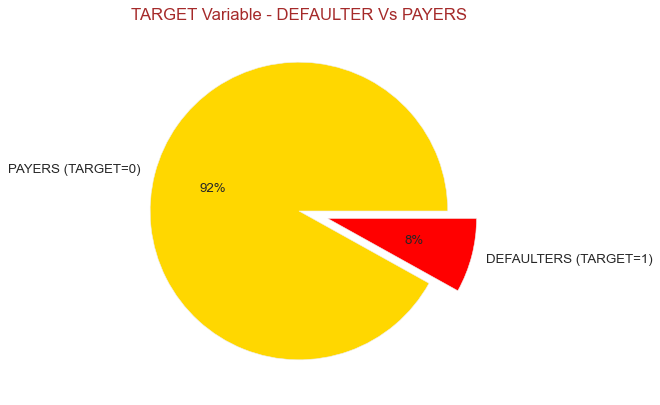

In [603]:
ShowPie('TARGET',['PAYERS (TARGET=0)','DEFAULTERS (TARGET=1)'],'TARGET Variable - DEFAULTER Vs PAYERS')

### It is evident that there is data imbalance in the target variable with an approximate ratio of 9:1 Re-Payers and Defaulters respectively

## <font color='brown'/> Perform EDA on Application_data.csv

## <font color='blue'/> 4.2 Perform Categorical Univariate Analysis

***
### Variables that will be used for categorical univariate analysis

* CODE_GENDER
* NAME_FAMILY_STATUS
* CNT_CHILDREN
* CNT_FAM_MEMBERS
* FLAG_OWN_REALTY
* OCCUPATION_TYPE
* NAME_INCOME_TYPE
* ORGANIZATION_TYPE
***

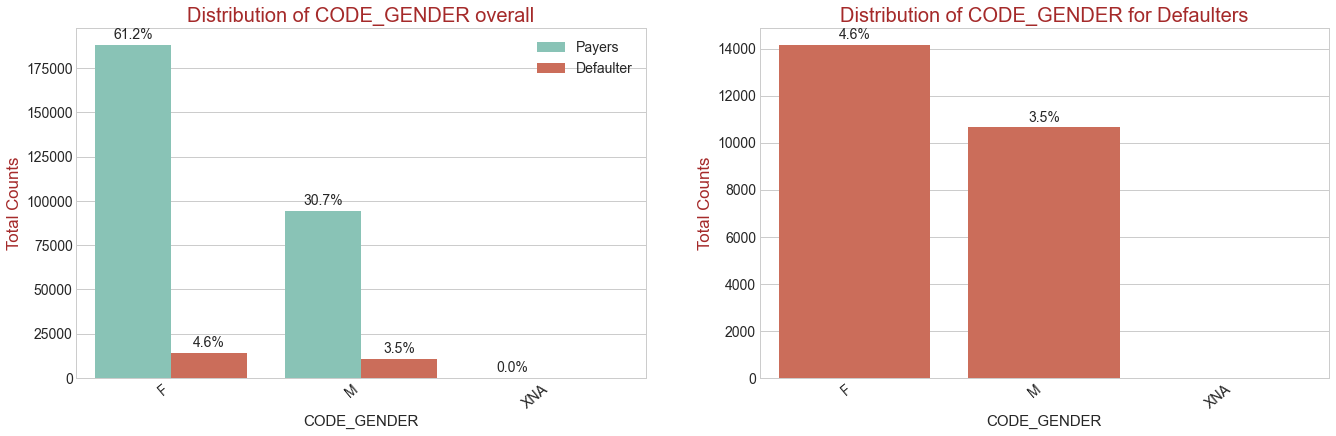

In [399]:
showPlotsOnly('OCCUPATION_TYPE vs NAME_FAMILY_STATUS vs RANGE_INCOME
 NAME_EDUCATION_TYPE vs CODE_GENDER vs RANGE_INCOME')

***
#### Inference from CODE_GENDER
* Visuals show that women applicant are double than thier male counterparts by almost double
* Defaulter percentage of females is comparatively lesser than males even though it shows higher, since the applicant % is double than males
***

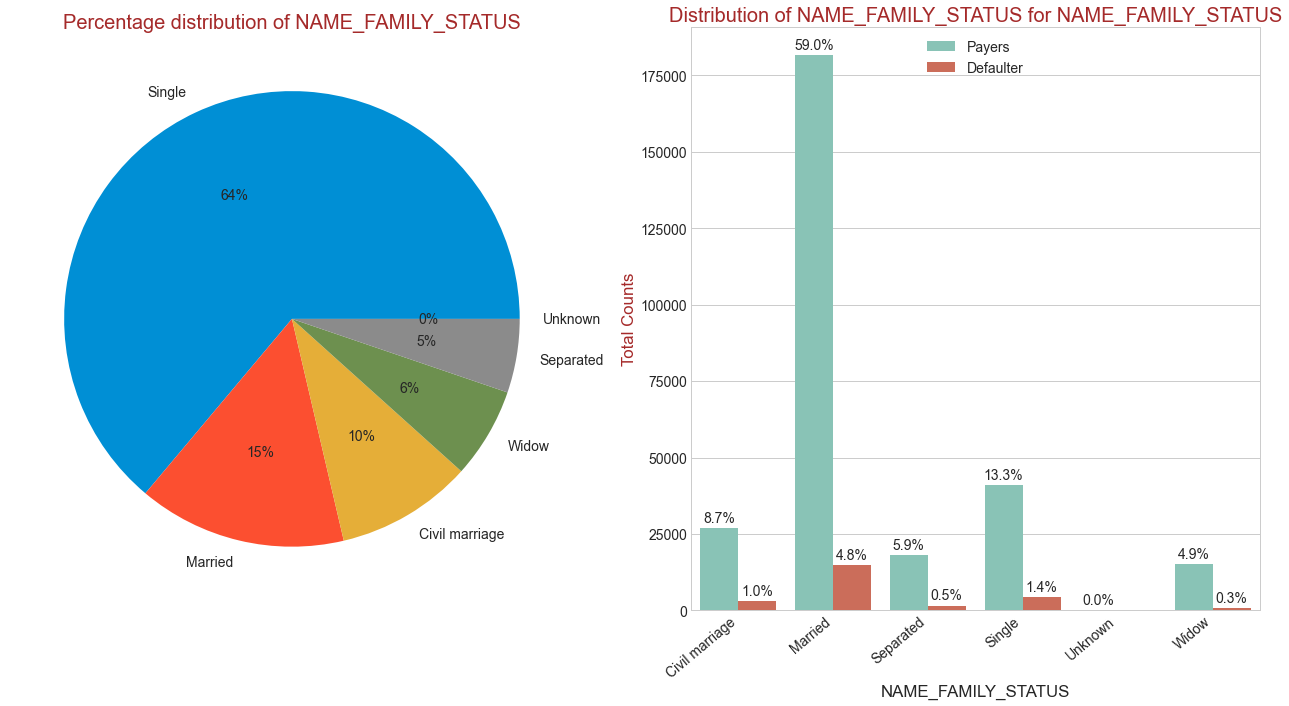

In [369]:
showPlotwithPie('NAME_FAMILY_STATUS')

***
#### Inference from NAME_FAMILY_STATUS
* Visuals indicate that ratio of Single persons applying for loan is double to the married people
* However Married and Civil Married people cumulatively tend to default much more than the single/widow/separated category
***

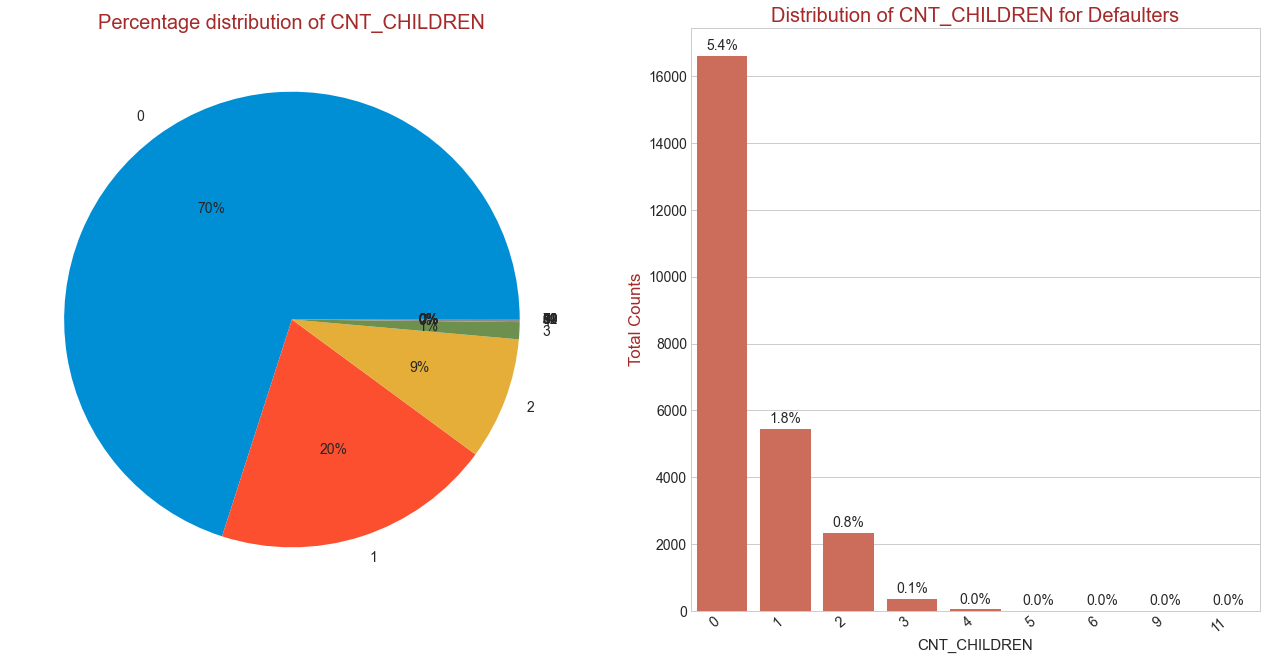

In [374]:
showPlotwithPie('CNT_CHILDREN',False)

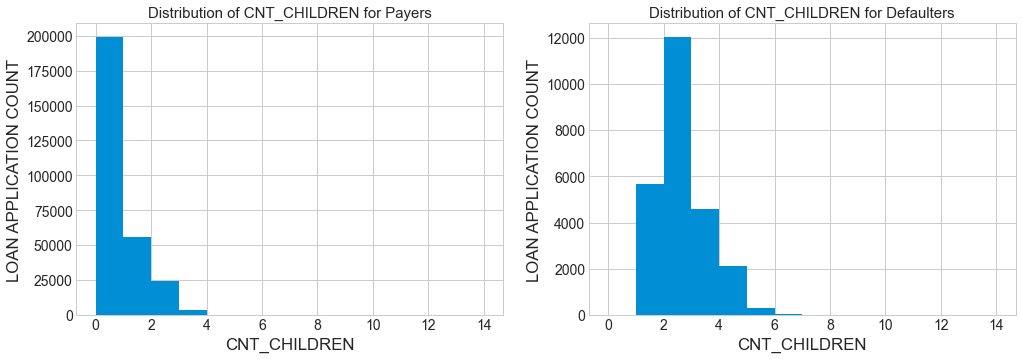

In [445]:
showHistPlot('CNT_CHILDREN')

***
#### Inference from CNT_CHILDREN
* Visuals indicate that almost 3/4th of total people who applied for loan did not have children and were less likely to be defaulters
* People with more than 3 children are likely to default more often than ones with no or 1 or 2 children
***

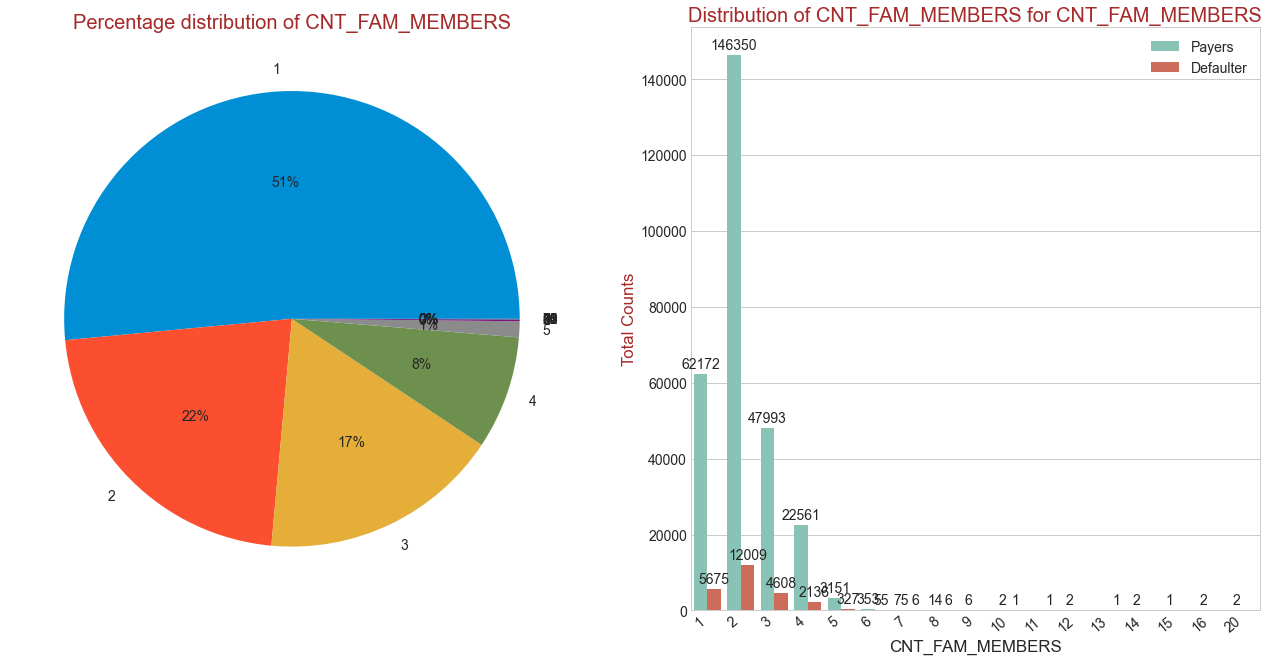

In [443]:
showPlotwithPie('CNT_FAM_MEMBERS')

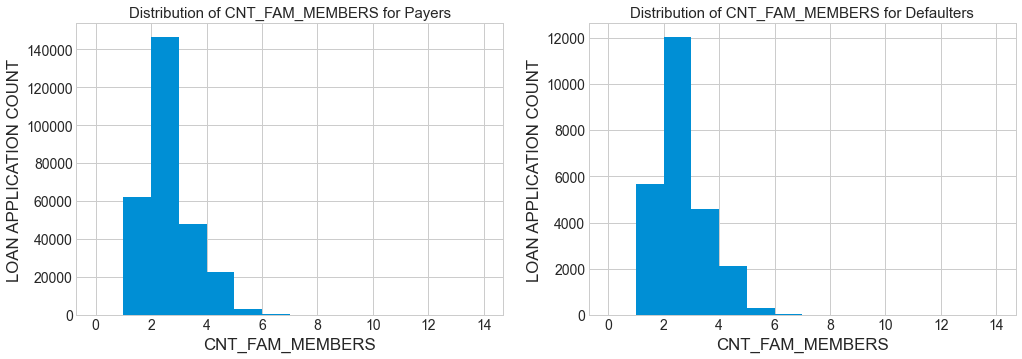

In [442]:
showHistPlot('CNT_FAM_MEMBERS')

***
#### Inference from CNT_FAM_MEMBERS
* Visuals indicate that while family of 1 and 2 formed major chunk of applicants but their percentage of defaulting were also low
* Also family of 3 applies loan more often than the other families
***

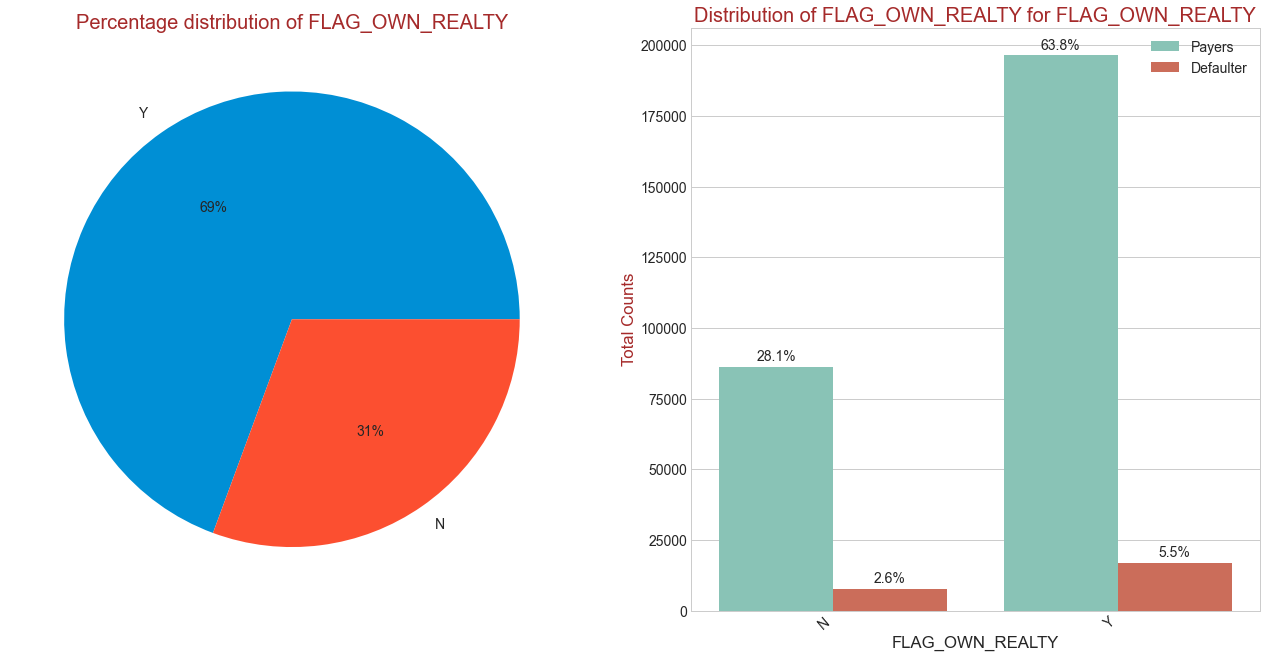

In [403]:
showPlotwithPie('FLAG_OWN_REALTY')

***
#### Inference from FLAG_OWN_REALTY
* Visuals indicate that almost 70% who applied for loan owned housing/realty which is double than who did no own any realty
* Defaulting rate seemed to be higher in people with no reality comparitively to those who did not
***

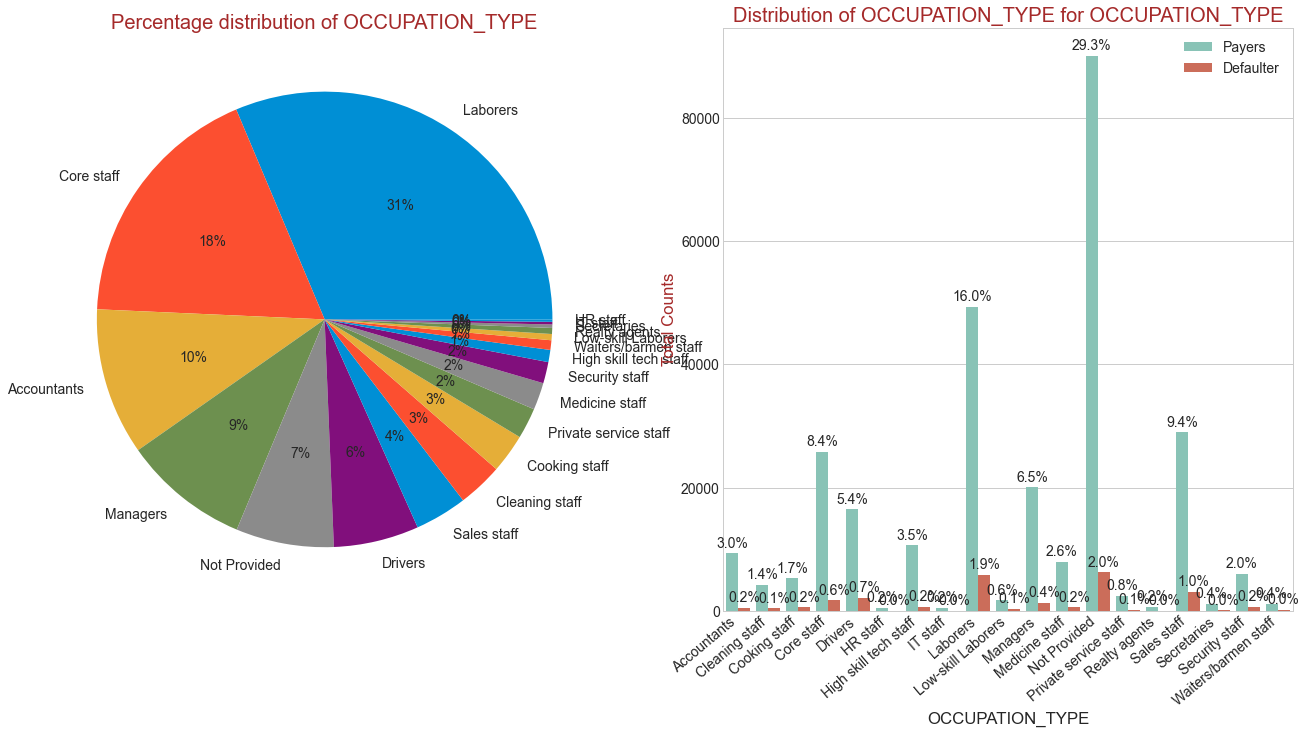

In [404]:
showPlotwithPie('OCCUPATION_TYPE')

***
#### Inference from OCCUPATION_TYPE
* Visuals indicate that Top applicants are Laborers ,Core Staff and Accountant
* Interestingly occupation type that is 'Not Provided' seemed to defaulted higher and next to this is Laborers group that has defaulted higher in comparison to others 
***


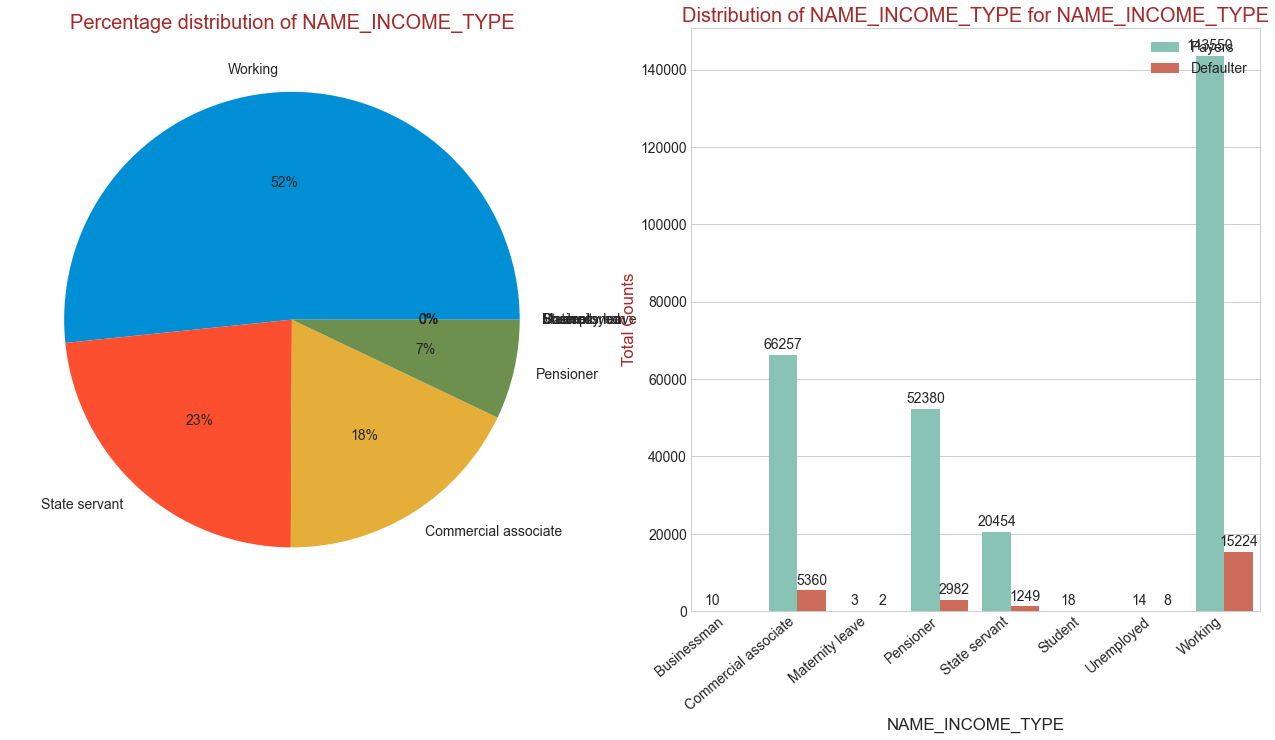

In [416]:
showPlotwithPie('NAME_INCOME_TYPE')

***
#### Inference from NAME_INCOME_TYPE
* Visuals indicate that most of the applicants are From Working Category & Commercial Associate and Least are Businessman and Student
* Default percentage is more on Maternity Leave and Unemployed applicant group
***


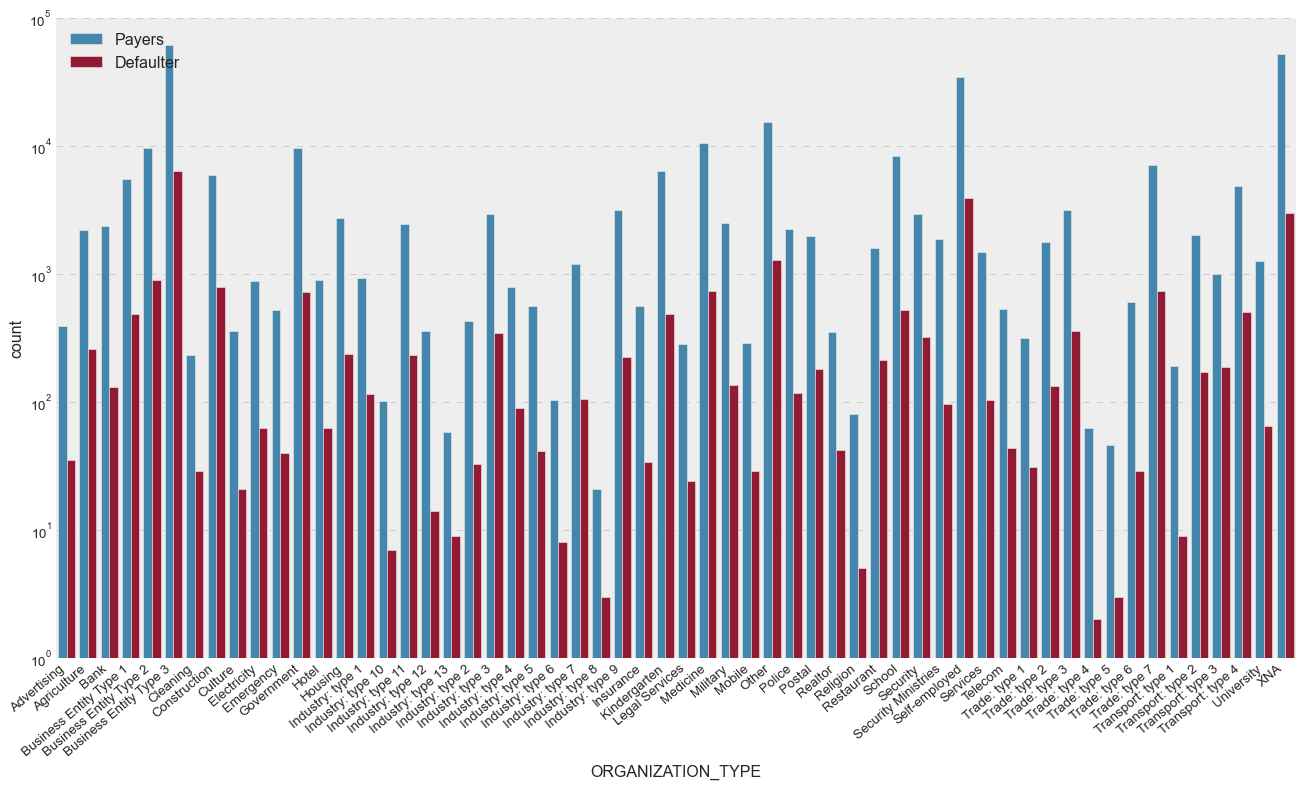

In [607]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'ORGANIZATION_TYPE', hue = 'TARGET', data = app_df)
plt.xticks(rotation=40, ha="right")
plt.yscale('log')
plt.legend(['Payers','Defaulter'],loc="upper left")
plt.show()

***
#### Inference from ORGANIZATION_TYPE
* Most of the Applicants are from Business Entity Type 3 , Missing (XNA) and Self Employed
* Self Employed people seemingly have pretty high defaulting rate
***

## <font color='blue'/> 4.3 Perform Categorical Ordinal Univariate Analysis

***
### Variables that will be used for categorical Ordinal univariate analysis

* AGE_GROUP
* NAME_EDUCATION_TYPE
* EMPLOYMENT_EXP
* RANGE_INCOME
* RANGE_CREDIT
***

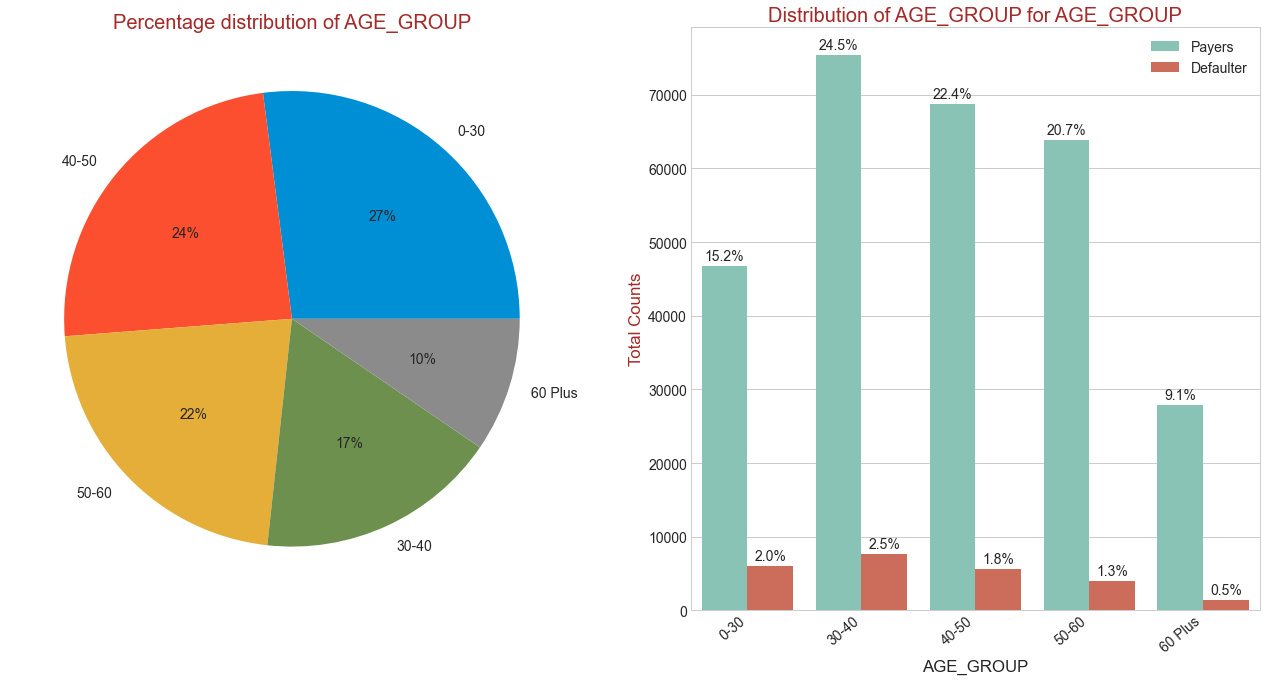

In [448]:
#showPlotsOnly('AGE_GROUP')
showPlotwithPie('AGE_GROUP')

***
#### Inference from AGE_GROUP
* We see that 0-30 and 40-60 age group tend to default more often. So they are the riskiest people to loan to.
* With increasing age group, people tend to default less starting from the age 40. One of the reasons could be that they have sufficient salary and saving to pay back loans
***

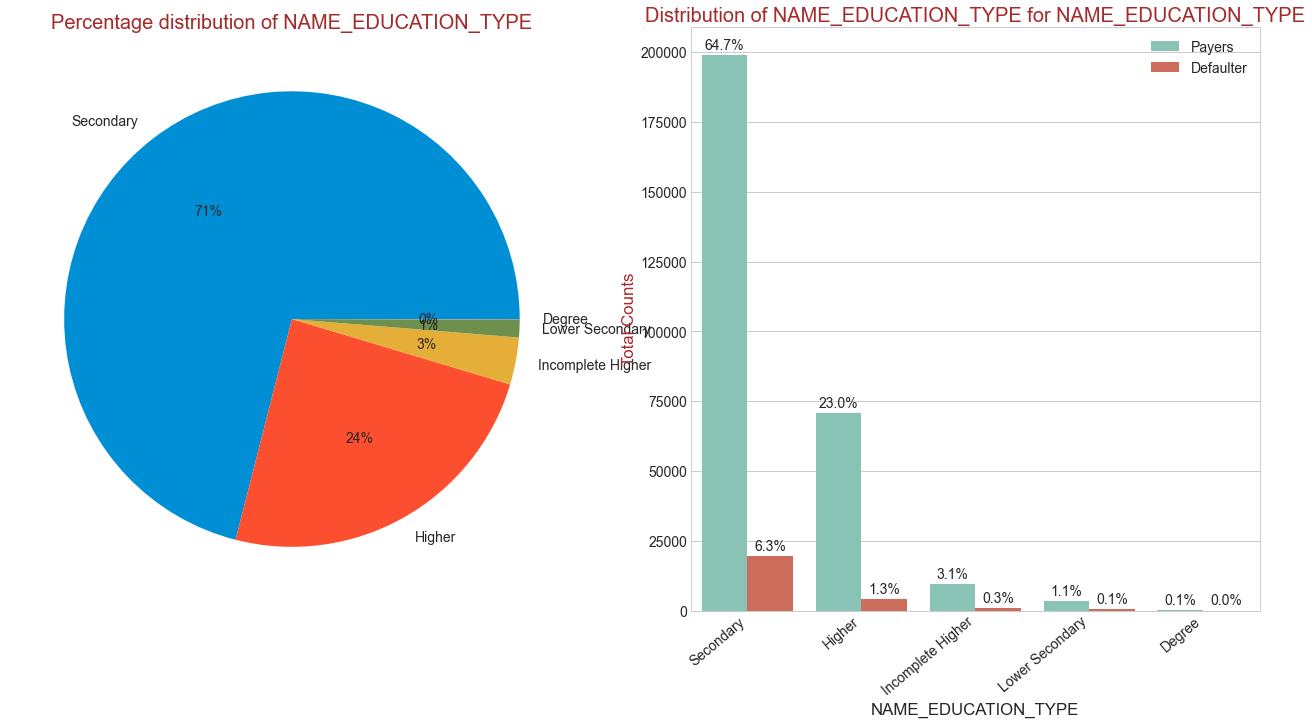

In [447]:
showPlotwithPie('NAME_EDUCATION_TYPE')

***
#### Inference from NAME_EDUCATION_TYPE
* Clearly 3/4 of the applicants have completed secondary level education and are like to default more than others
* Very few customers have an academic degree
* Clearly Lower Secondary educated customers have highest defaulting percentage
***

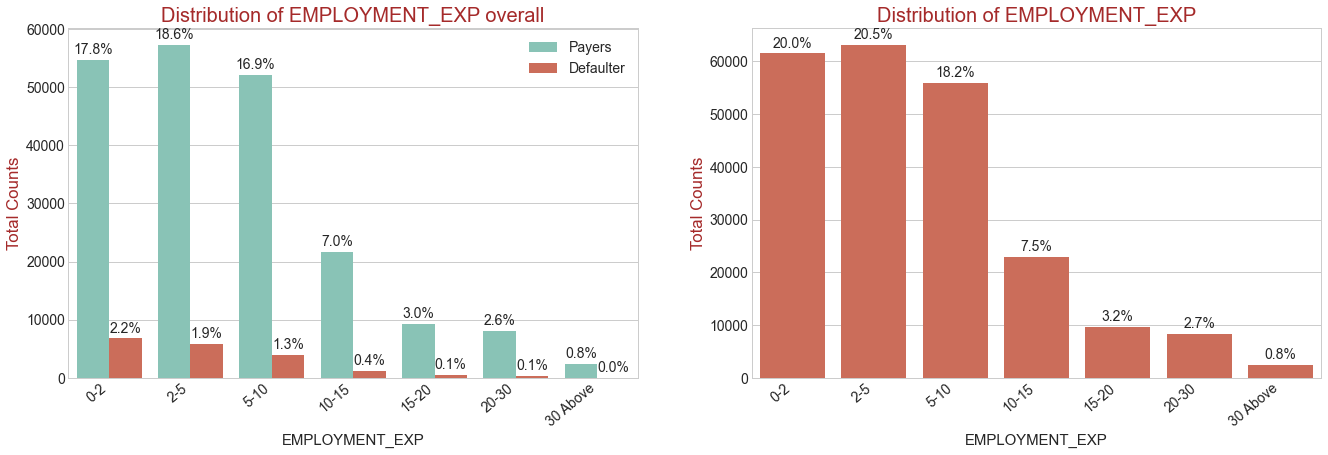

In [434]:
showPlotsOnly('EMPLOYMENT_EXP',True,False)

***
#### Inference from EMPLOYMENT_EXP
* Majority of the applicants have been employeed in between 0-5 years. The defaulting % of this group is also the highest 
* With increase of employment year, defaulting rate is gradually decreasing with people having 15+ year experience
***

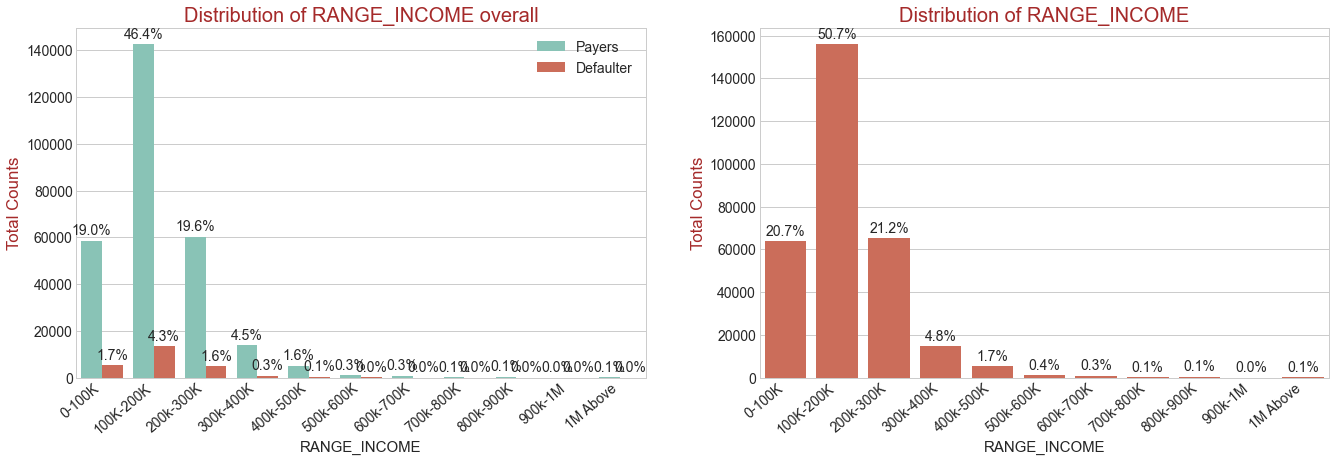

In [433]:
showPlotsOnly('RANGE_INCOME',True,False)

***
#### Inference from RANGE_INCOME
* Almost 90% of applicant are in less than 300K income range 
* Defaulting percentage is higher among income in bracket 0-200K
* Applicants with greater than 600K income are quite less likely to default
***

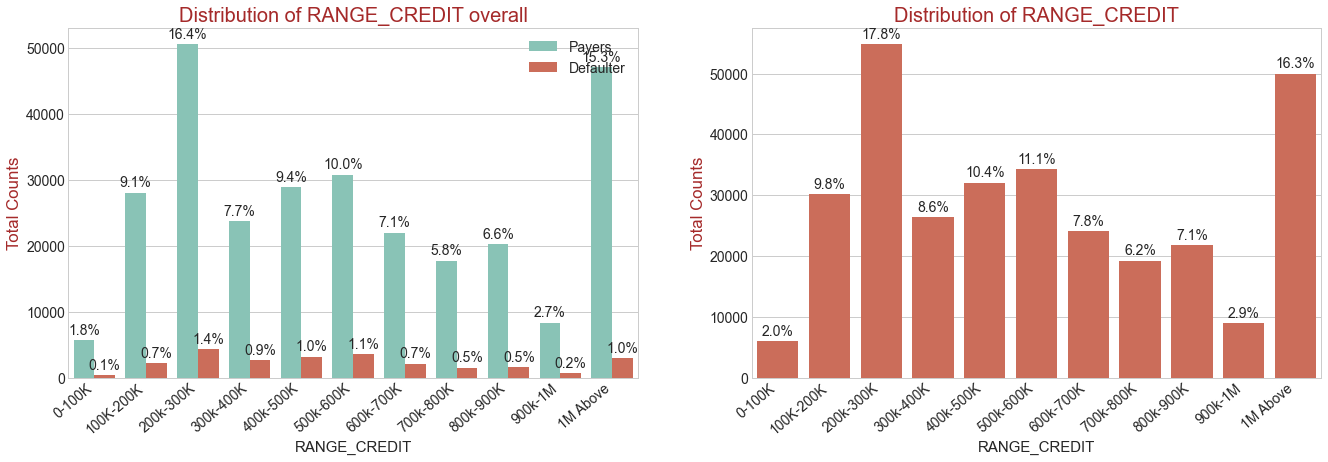

In [435]:
showPlotsOnly('RANGE_CREDIT',True,False)

***
#### Inference from RANGE_CREDIT
* Almost 16% of applicant have applied from 1M-Above loan credit
* Around 80% of people request for less than 1M credit
* People who get loan for 200-600k tend to default more than others.
***

## <font color='blue'/> 4.4  Categorical Bivariate/Multivariate analysis

***
### Following combination to use for Bivariate/Multivariate analysist
* OCCUPATION_TYPE vs NAME_FAMILY_STATUS 
* NAME_EDUCATION_TYPE vs CODE_GENDER
***

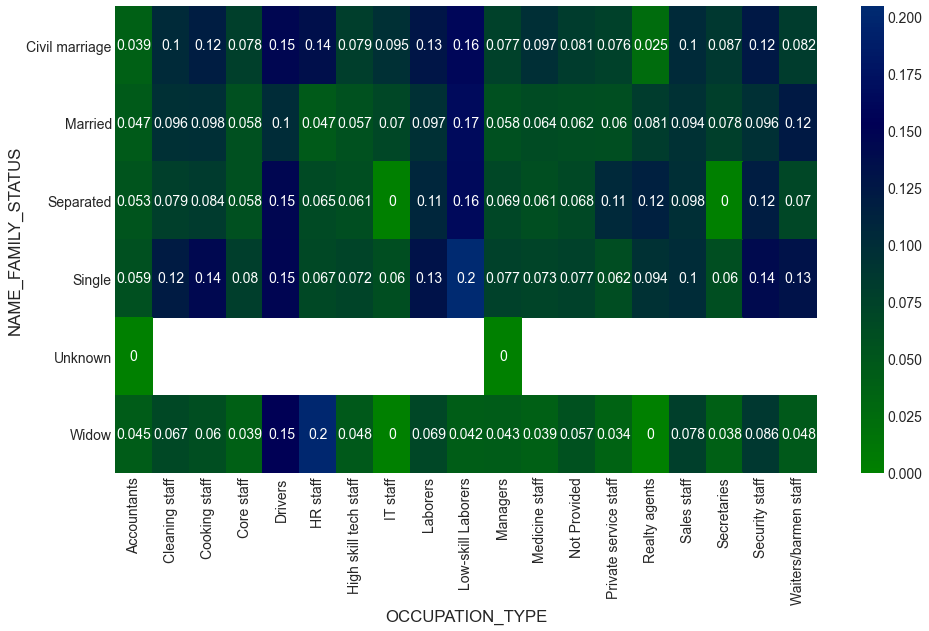

In [470]:
# * OCCUPATION_TYPE vs NAME_FAMILY_STATUS 
plt.figure(figsize=(14,8))
res1 = pd.pivot_table(data=app_df, index='NAME_FAMILY_STATUS',columns='OCCUPATION_TYPE',values='TARGET')
sns.heatmap(res1,annot=True,cmap='ocean',center=0.23)
plt.show()

***
#### Inference from OCCUPATION_TYPE vs NAME_FAMILY_STATUS
* Drivers and Low-skill laborers irrespective of their family status are highest defaulters
* While Windows tend to be payers but once in occupation of HR staff and driving tend to default more than others
* On the contrary Civil married status default in mulitple occupation categories than the Married ones. 
* Married family status have strong tendency to be Payers
***

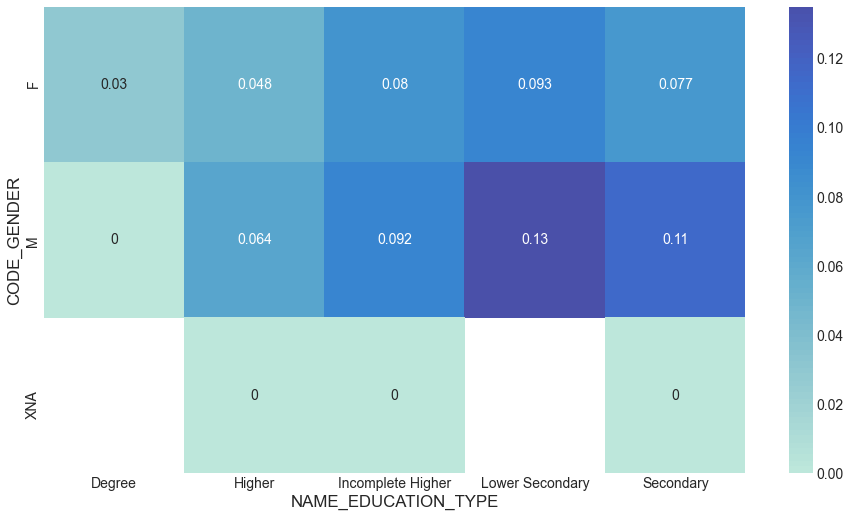

In [473]:
# NAME_EDUCATION_TYPE vs CODE_GENDER
plt.figure(figsize=(14,8))
res1 = pd.pivot_table(data=app_df, index='CODE_GENDER',columns='NAME_EDUCATION_TYPE',values='TARGET')
sns.heatmap(res1,annot=True,cmap='icefire',center=0.23)
plt.show()

***
#### Inference from NAME_EDUCATION_TYPE vs CODE_GENDER
* Evidently males who are Lower Secondary and Secondary qualification have tendency to default than others
* Both males and females with Degree are Payers and do not default
***

## <font color='blue'/> 4.5  Numeric Univariate analysis

In [571]:
#KDE PLOTS
def showNumPlot(var):
    fig = plt.figure(figsize=(10,6))
    sns.kdeplot(data=app_df,x=var,hue = 'TARGET')
    ticks = np.arange(0,4200000,1000000)
    labels = ["{}M".format(i//1000000) for i in ticks]
    plt.xticks(ticks,labels)
    plt.show()

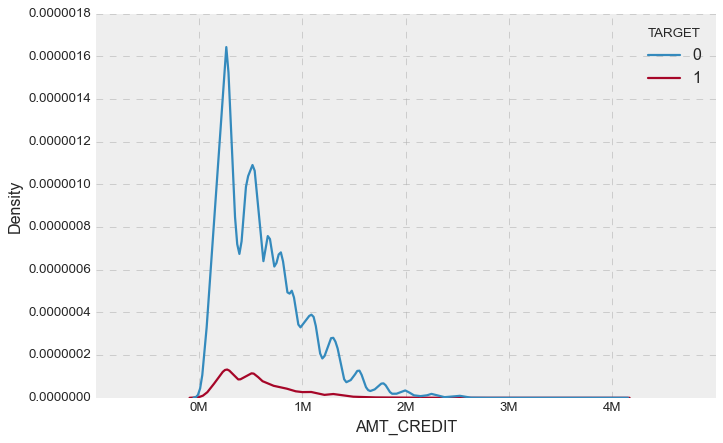

In [572]:
showNumPlot('AMT_CREDIT')

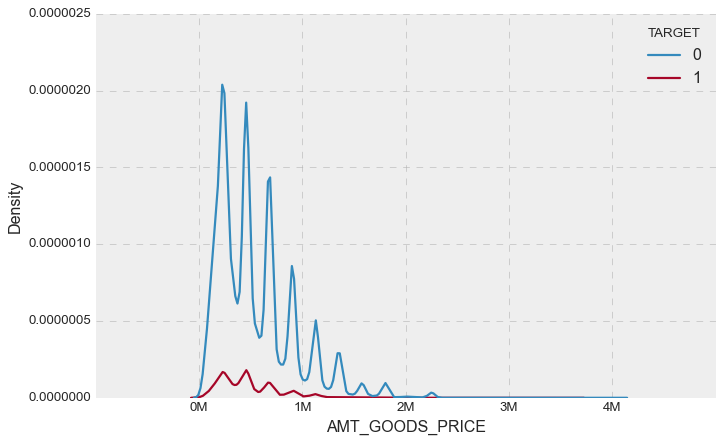

In [573]:
showNumPlot('AMT_GOODS_PRICE')

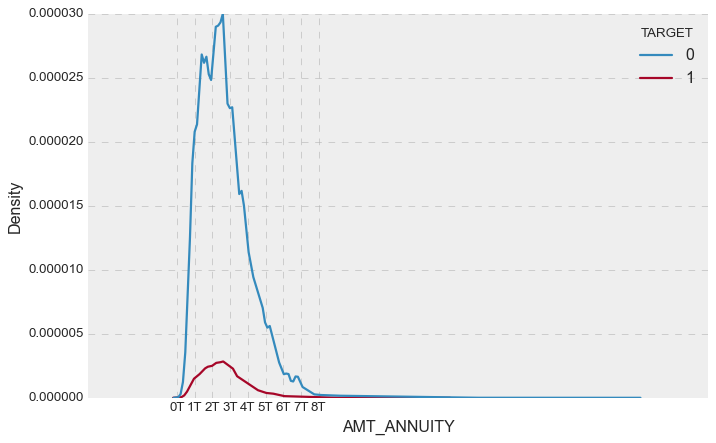

In [574]:

fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=app_df,x='AMT_ANNUITY',hue = 'TARGET')
ticks = np.arange(0,90000,10000)
labels = ["{}T".format(i//10000) for i in ticks]
plt.xticks(ticks,labels)
plt.show()

#### Inference from Numerical Univariate analysis of  'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE'
* Maximum number of Credits are below 1M or 10L
* We see similar trend with GOODs price, most goods price are below 10L
* While defaulter density is less for both CREDIT and GOOD Price but their trend looks alike, so we can conclude that these amounts do not have any influence on DEFAULT rate


## <font color='blue'/> 4.6  Numeric Bivariate analysis

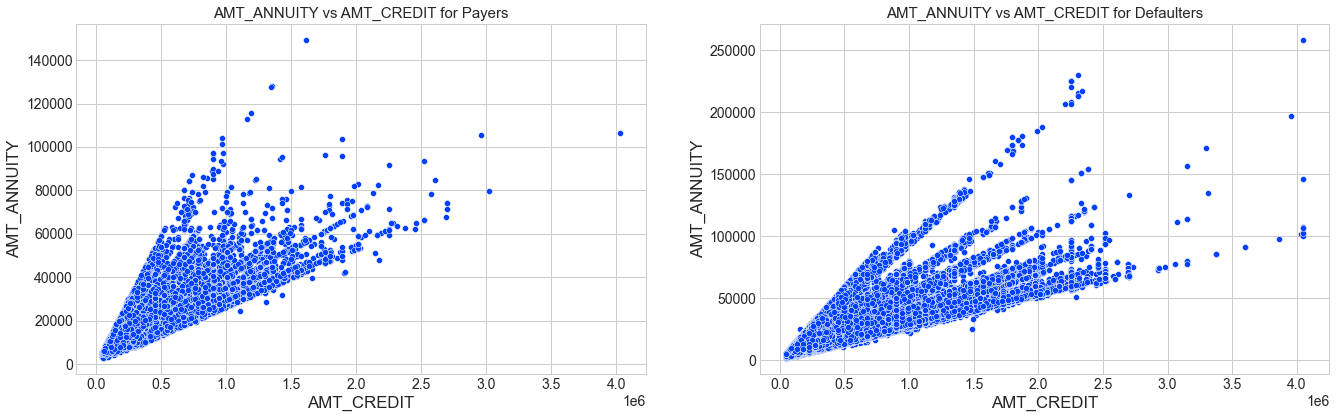

In [520]:
plt.style.use('seaborn-bright')
sns.despine
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))

sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY',data=app_defaulter,ax=ax1)
ax1.set_xlabel('AMT_CREDIT')    
ax1.set_ylabel('AMT_ANNUITY')
ax1.set_title('AMT_ANNUITY vs AMT_CREDIT for Payers',fontsize=15)

sns.scatterplot(x='AMT_CREDIT', y='AMT_ANNUITY',data=app_payers,ax=ax2)
ax2.set_xlabel('AMT_CREDIT')    
ax2.set_ylabel('AMT_ANNUITY')
ax2.set_title('AMT_ANNUITY vs AMT_CREDIT for Defaulters',fontsize=15)

plt.show()

#### Inference from Numerical Bivariate analysis of  'AMT_CREDIT','AMT_ANNUITY'

* We can conclude that when the AMT_CREDIT cores beyond 2M we see rise in defaulters.
* It is evindent that AMT_CREDIT is directly related to AMT_ANUUITY

## <font color='brown'/> Perform EDA on Previous_application.csv

## <font color='blue'/> 5.2  Categoric Univariate analysis

In [543]:
def bivarCountplot(var):
    plt.style.use('bmh')
    fig,ax = plt.subplots(1,1,figsize=(10,5))

    sns.countplot(x=var, data=prevapp_df,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Distribution of {var}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [545]:
prevapp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
0     17145.0          17145.0                       15   
1    679671.0         607500.0                       11   
2    136444.5         112500.0                       11   
3    470790.0         450000.0                        7   
4    404055.0         337500.0                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved             73  Cash through the bank   
1             Approved            164                    XNA   
2             Approved            301  Cash through the bank   
3             Approved            512  Cash through the bank   
4              Refused            781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity         12.0           middle  POS mobile with interest  
1                  XNA         36.0       low_action          Cash X-Sell: low  
2                  XNA         12.0             high         Cash X-Sell: high  
3                  XNA         12.0           middle       Cash X-Sell: middle  
4                  XNA         24.0             high         Cash Street: high

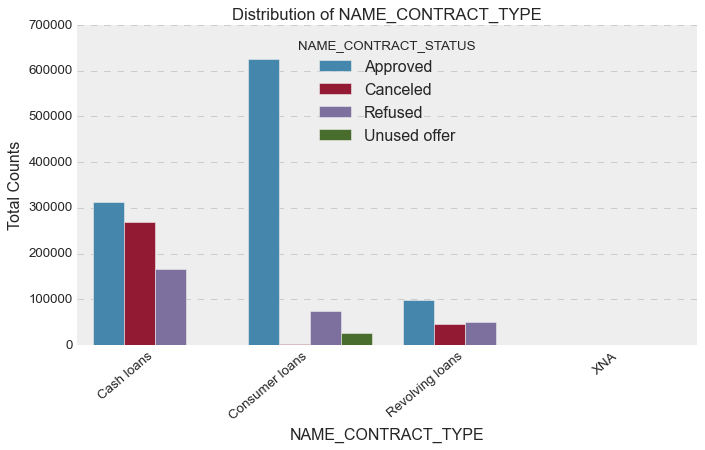

In [544]:
bivarCountplot('NAME_CONTRACT_TYPE')

#### Inference from Categorical analysis of NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS

* Clearly Consumer loans and Cashloans were most requested type of loans
* While we see that Consumer loans has 100% approval rate but we see that Cashloan does have rejections

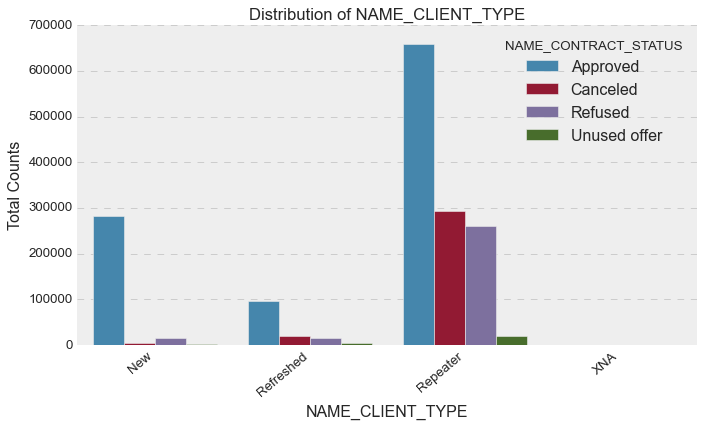

In [547]:
bivarCountplot('NAME_CLIENT_TYPE')

#### Inference from Categorical Bivariate analysis of NAME_CLIENT_TYPE and NAME_CONTRACT_STATUS

* Repeater count is the highest among the type of clients, it amounts to almost 70%
* New applications come next to the Repeaters 
* We see highest refusla rate amont Repeaters

## <font color='blue'/> 6.2  Analysis on combined dataframes

In [551]:
mergeApp_df = pd.merge(app_df, prevapp_df, how='left', on=['SK_ID_CURR'])

In [552]:
mergeApp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430155 non-null  int64   
 1   TARGET                       1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1430155 non-null  category
 3   CODE_GENDER                  1430155 non-null  category
 4   FLAG_OWN_CAR                 1430155 non-null  category
 5   FLAG_OWN_REALTY              1430155 non-null  category
 6   CNT_CHILDREN                 1430155 non-null  int64   
 7   AMT_INCOME_TOTAL             1430155 non-null  float64 
 8   AMT_CREDIT_x                 1430155 non-null  float64 
 9   AMT_ANNUITY_x                1430155 non-null  float64 
 10  AMT_GOODS_PRICE_x            1430155 non-null  float64 
 11  NAME_TYPE_SUITE              1430155 non-null  category
 12  NAME_INCOME_TYPE            

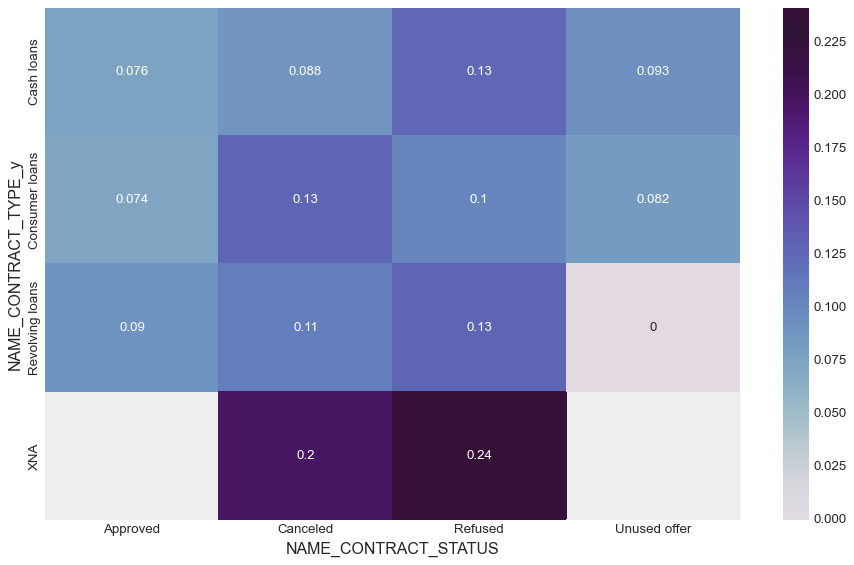

In [566]:
# NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS

plt.figure(figsize=(14,8))
res1 = pd.pivot_table(data=mergeApp_df, index='NAME_CONTRACT_TYPE_y',columns='NAME_CONTRACT_STATUS',values='TARGET')
sns.heatmap(res1,annot=True,cmap='twilight',center=0.23)
plt.show()


#### Inference from bivariate of NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS

* Clearly defaulting % is higher for people who were refused revolving or cash loans
* Overall we see that people for whom loans were refused have higher chances to default

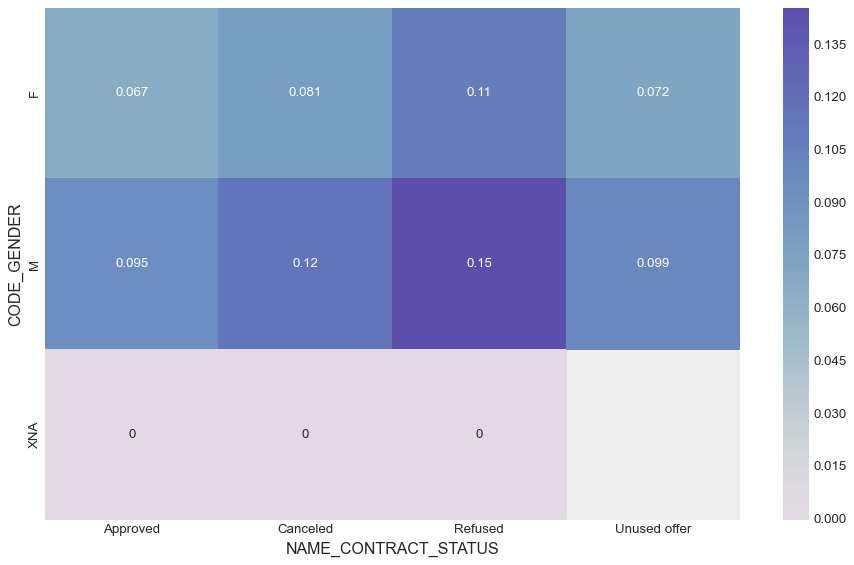

In [567]:
# NAME_CONTRACT_TYPE and NAME_CONTRACT_STATUS

plt.figure(figsize=(14,8))
res1 = pd.pivot_table(data=mergeApp_df, index='CODE_GENDER',columns='NAME_CONTRACT_STATUS',values='TARGET')
sns.heatmap(res1,annot=True,cmap='twilight',center=0.23)
plt.show()

***
#### Inference from bivariate of CODE_GENDER and NAME_CONTRACT_STATUS

* As seen earlier that female have lesser chances of default compared to males. This reflects even from the previous application.
* We do not see any bias from financial institues based on gender when it comes to approval or rejection of loans
* Like seen earliern rejected applicants in past have chances to default
***

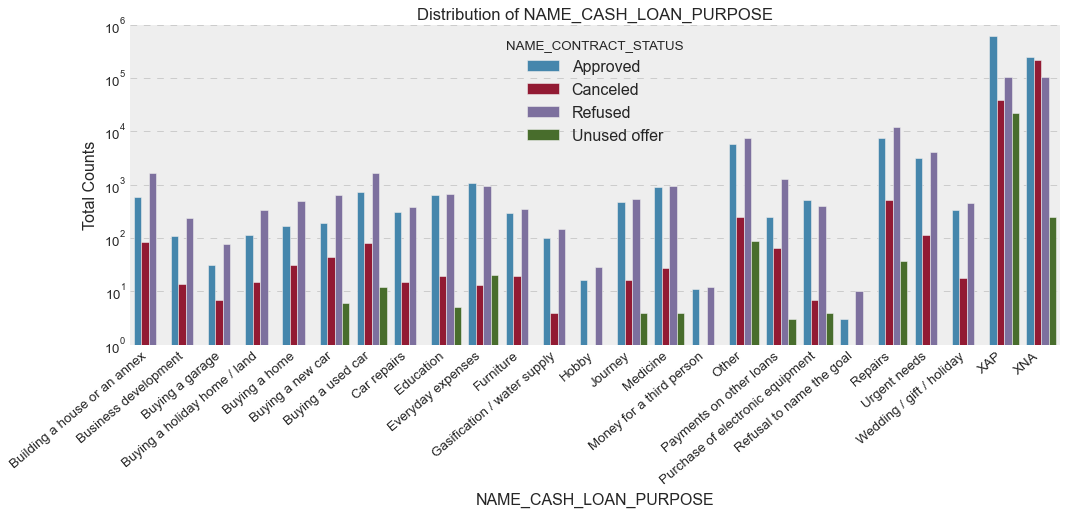

In [582]:
plt.style.use('bmh')
fig,ax = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=mergeApp_df,ax=ax,hue='NAME_CONTRACT_STATUS')
ax.set_ylabel('Total Counts')
ax.set_title(f'Distribution of NAME_CASH_LOAN_PURPOSE',fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.yscale('log')
plt.show()

***
#### Inference from bivariate of NAME_CASH_LOAN_PURPOSE and NAME_CONTRACT_STATUS
* Clearly Loan purpose are considerable high for unknow values like XAP and SNA
* There is large number of rejections for loans taken against Repairs and OTher Category apart from XAP and XNA
* It appears that financial instititues find high risk in lending loans for REPAIR purposes

***

## <font color='blue'/> 6.3  Correlation Matrix for Defaulters

In [597]:
def_corr= app_defaulter.corr() # Create correlation matrxix

## Select upper triangle of correlation matrix
defaulter_corrDF = def_corr.where(np.triu(np.ones(def_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

defaulter_corrDF.columns=['Column1','Column2','Correlation'] # setting column headers
defaulter_corrDF.dropna(subset=['Correlation'],inplace=True) # drop entries for which correlation is null
defaulter_corrDF['Abs_Correlation']=defaulter_corrDF['Correlation'].abs() # add column with absolution correlation values
defaulter_corrDF = defaulter_corrDF.sort_values(by=['Abs_Correlation'], ascending=False) # sort dataframe based on descending absolute correlation
defaulter_corrDF.head(10)

Column1                   Column2  Correlation  \
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
154           AMT_GOODS_PRICE                AMT_CREDIT     0.982783   
302           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484   
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
155           AMT_GOODS_PRICE               AMT_ANNUITY     0.752295   
129               AMT_ANNUITY                AMT_CREDIT     0.752195   
233             DAYS_EMPLOYED                DAYS_BIRTH     0.582185   
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.337389   
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.334035   
258         DAYS_REGISTRATION                DAYS_BIRTH     0.289114   

     Abs_Correlation  
414         0.998270  
154         0.982783  
302         0.885484  
440         0.869016  
155         0.752295  
129         0.752195  
233         0.582185  
415         0.337389  
389         0.334035  
258         0.289114

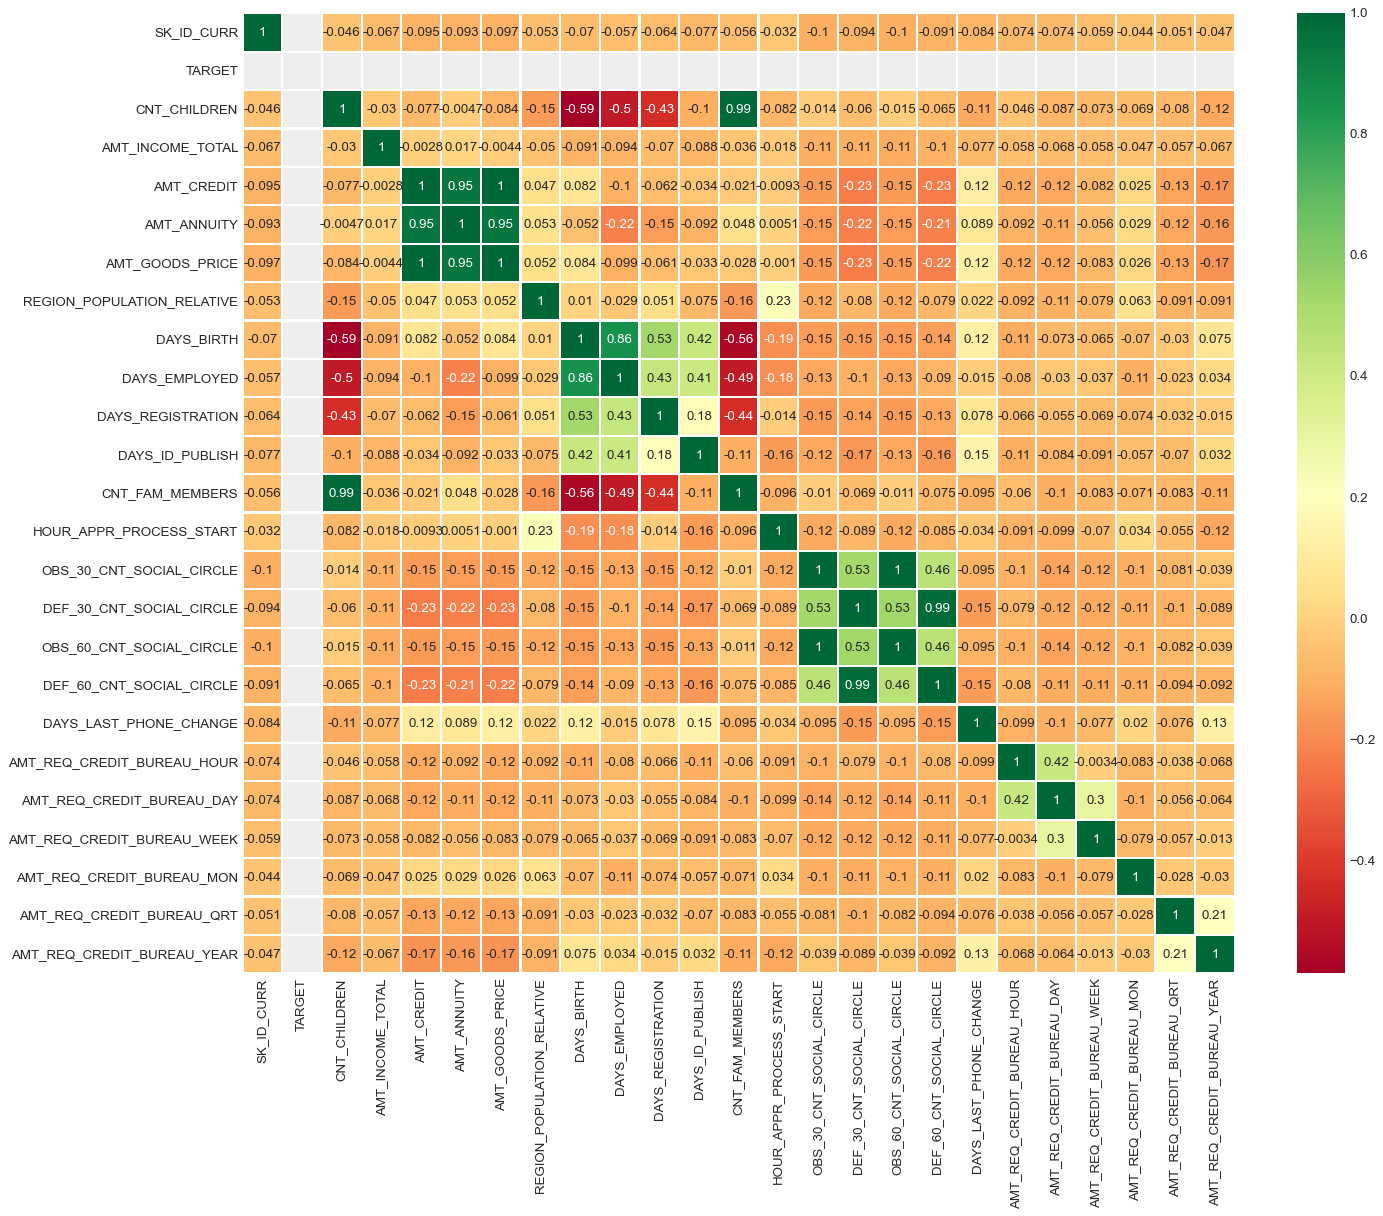

In [600]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(def_corr.corr(), cmap="RdYlGn",annot=True,linewidth =1)

## <font color='blue'/> 6.3  Correlation Matrix for Payers

In [598]:
pay_corr= app_payers.corr() # Create correlation matrxix

## Select upper triangle of correlation matrix
payer_corrDF = def_corr.where(np.triu(np.ones(pay_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

payer_corrDF.columns=['Column1','Column2','Correlation'] # setting column headers
payer_corrDF.dropna(subset=['Correlation'],inplace=True) # drop entries for which correlation is null
payer_corrDF['Abs_Correlation']=defaulter_corrDF['Correlation'].abs() # add column with absolution correlation values
payer_corrDF = payer_corrDF.sort_values(by=['Abs_Correlation'], ascending=False) # sort dataframe based on descending absolute correlation
payer_corrDF.head(10)

Column1                   Column2  Correlation  \
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
154           AMT_GOODS_PRICE                AMT_CREDIT     0.982783   
302           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484   
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
155           AMT_GOODS_PRICE               AMT_ANNUITY     0.752295   
129               AMT_ANNUITY                AMT_CREDIT     0.752195   
233             DAYS_EMPLOYED                DAYS_BIRTH     0.582185   
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.337389   
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.334035   
258         DAYS_REGISTRATION                DAYS_BIRTH     0.289114   

     Abs_Correlation  
414         0.998270  
154         0.982783  
302         0.885484  
440         0.869016  
155         0.752295  
129         0.752195  
233         0.582185  
415         0.337389  
389         0.334035  
258         0.289114

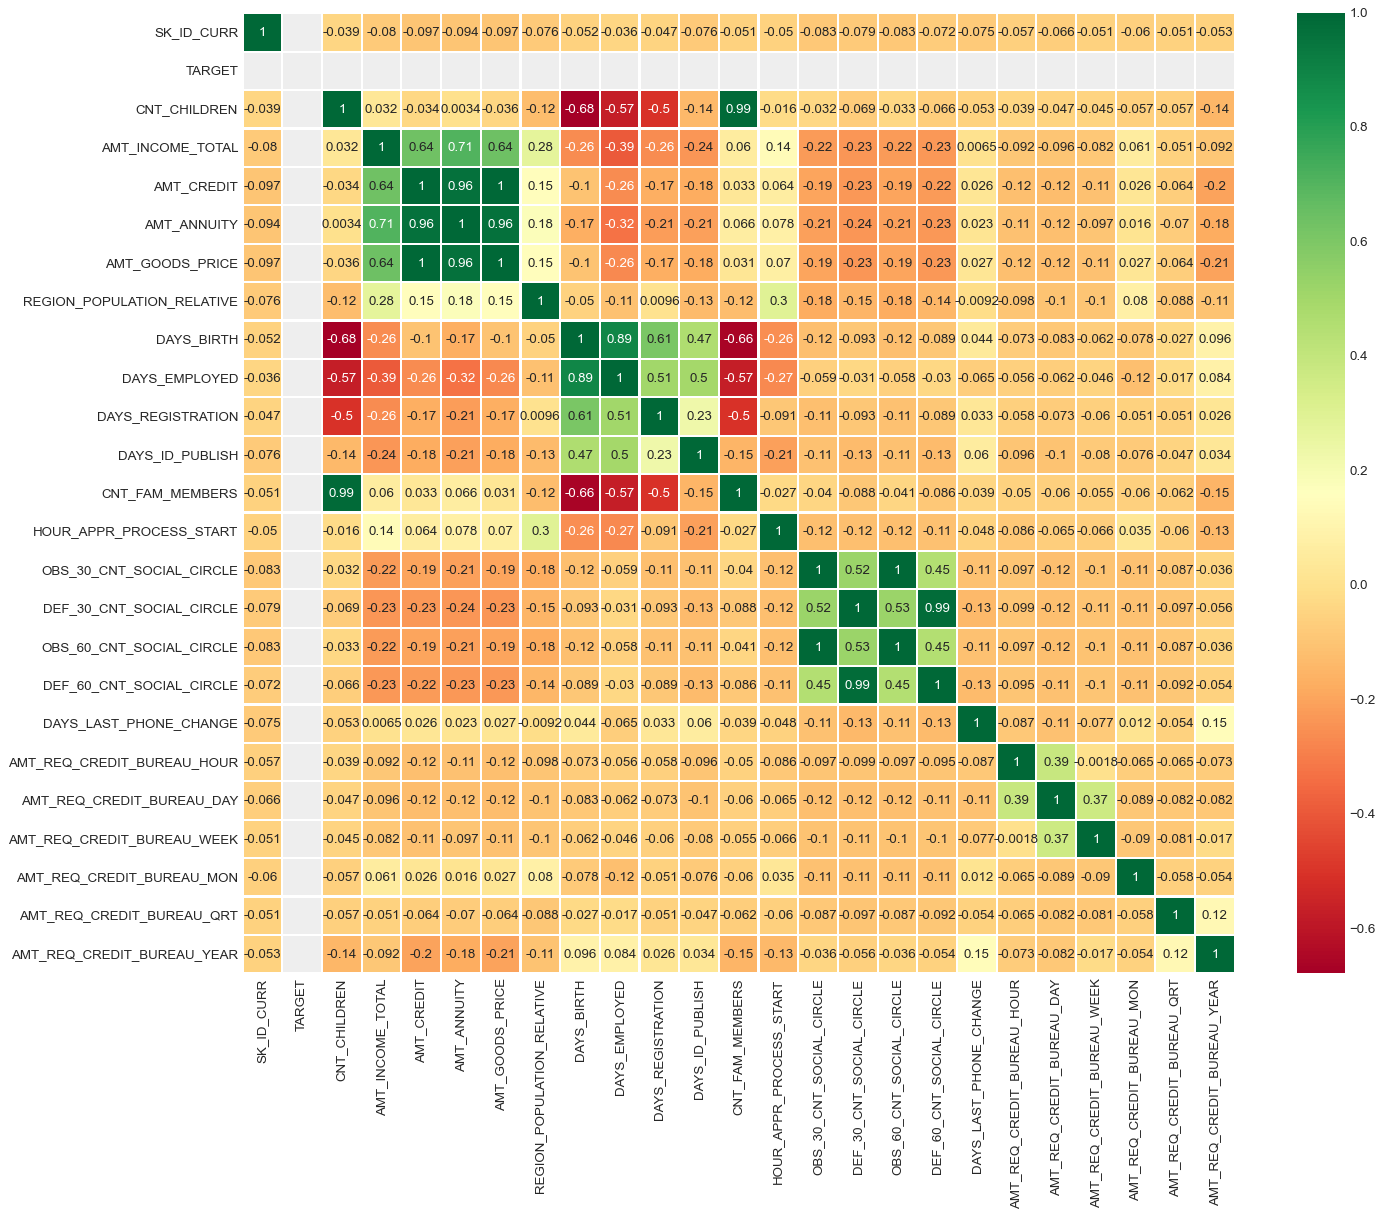

In [601]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(pay_corr.corr(), cmap="RdYlGn",annot=True,linewidth =1)

****
### Inferences from CORRELATION matrix of Defaulters and Payers

* Top 10 correlation variables for defaulters and payers are in almost same range 0.29 to 0.99
* When comparing defaulters with payers, we see correlation between total income and the credit amount significantly dropped from 0.64 for Payers to 0.0028 for defaulters 
* For both Defaulters and Payers Credit Amount and Good Prices are highely correlated
* DAYS_BIRTH and CNT_CHILDREN correlation dropped for defaulters to 0.59 from Payers which was at 0.65
* We see possible correlation between Social Surroundings variables for both defaulters and Payers

****